In [401]:
# Import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading data



In [402]:
## Trying to load data from csv
loanData = pd.read_csv('loan.csv', low_memory=False)
loanData.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# Data cleaning

In [403]:
# Removing rows with loan status = current
# These roles can not help to related to desire result of defaul or not.
loanData = loanData.drop(loanData[loanData.loan_status == "Current"].index)


In [404]:
# Removing all columns which have only null values.
loanData=loanData.drop(loanData.columns[(~loanData.isnull()).sum() == 0], axis=1)

In [405]:
# removing all columns having single unique value only
loanData=loanData.drop(loanData.columns[loanData.nunique() == 1], axis=1)


In [406]:
# Find all columns with data type as object to see any numeric or date type are treated as object
loanData.dtypes[loanData.dtypes == "object"]

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
url                    object
desc                   object
purpose                object
title                  object
zip_code               object
addr_state             object
earliest_cr_line       object
revol_util             object
last_pymnt_d           object
last_credit_pull_d     object
dtype: object

Based on above data and inspecting manually the load data set file and column description file we can conclude below:

- int_rate can be cleaned to remove "%" character and then convert it into float
- issue_d, earliest_cr_line, last_credit_pull_d should be date type. Need to perform the coversion.
- removing % from revol_util and convert into float.
- url, id, member_id column is not useful can be dropped
- we can remove desc, title column it being free form text not useful for result analysis
- we should remove last_pymnt_d since this an attribute which came after loan application approval.

In [407]:
# We are removing % from int_rate 
# We are converting it into float type

loanData['int_rate'] = loanData['int_rate'].apply(lambda x:x.replace("%", "")).astype('float')
loanData['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [408]:
# we are converting issue_d into datetime
loanData['issue_d'] = pd.to_datetime("01-" + loanData['issue_d'])
loanData['issue_d'].describe()

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2566756765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loanData['issue_d'] = pd.to_datetime("01-" + loanData['issue_d'])


count                            38577
mean     2010-10-25 23:47:14.030640128
min                2007-06-01 00:00:00
25%                2010-05-01 00:00:00
50%                2011-01-01 00:00:00
75%                2011-08-01 00:00:00
max                2011-12-01 00:00:00
Name: issue_d, dtype: object

In [409]:
# dropping url column 
loanData = loanData.drop(['url', 'id', 'member_id', 'last_pymnt_d', 'desc', 'title'], axis=1)

In [410]:
loanData['earliest_cr_line'] = pd.to_datetime("01-" + loanData['earliest_cr_line'])
loanData['earliest_cr_line'].describe()

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\4101106780.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loanData['earliest_cr_line'] = pd.to_datetime("01-" + loanData['earliest_cr_line'])


count                         38577
mean     1997-12-07 18:49:01.255152
min             1974-01-01 00:00:00
25%             1994-01-01 00:00:00
50%             1998-07-01 00:00:00
75%             2001-10-01 00:00:00
max             2073-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [411]:
loanData['last_credit_pull_d'] = pd.to_datetime("01-" + loanData['last_credit_pull_d'])
loanData['last_credit_pull_d'].describe()

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\4002326991.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loanData['last_credit_pull_d'] = pd.to_datetime("01-" + loanData['last_credit_pull_d'])


count                            38575
mean     2014-08-21 06:31:55.582631168
min                2007-05-01 00:00:00
25%                2013-05-01 00:00:00
50%                2015-02-01 00:00:00
75%                2016-04-01 00:00:00
max                2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

In [412]:
loanData['revol_util'] = loanData['revol_util'].apply(lambda x: float(str(x).replace("%", "")))
loanData['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [413]:
# Keeping all the object whose types are for string data only
loanData.dtypes[loanData.dtypes == "object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
zip_code               object
addr_state             object
dtype: object

# Derive Variables

In [414]:
# extracting month and year from issue_date
loanData['issue_d_month'] = loanData['issue_d'].apply(lambda x: x.month)
loanData['issue_d_year'] = loanData['issue_d'].apply(lambda x: x.year)

# get year from issue_d and replace the same
loanData["earliest_cr_line_month"] = loanData["earliest_cr_line"].apply(lambda x: x.month)
loanData["earliest_cr_line_year"] = loanData["earliest_cr_line"].apply(lambda x: x.year)

# Create new column as representation of update loan_status as Fully Paid to 0 and Charged Off to 1
loanData["is_defaulter"] = loanData["loan_status"].apply(lambda x: False if x == "Fully Paid" else True)


In [415]:
# describe loan amount
loanData["loan_amnt"].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [416]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loanData['loan_amnt_range'] = pd.cut(loanData['loan_amnt'], bins, labels=bucket_l)

In [417]:
# describe interest rate
loanData["int_rate"].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [418]:
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loanData['int_rate_range'] = pd.cut(loanData['int_rate'], bins, labels=bucket_l)
loanData[['int_rate_range', 'int_rate']].head(10)

int_rate_range  int_rate
0         10-12.5     10.65
1             15+     15.27
2             15+     15.96
3         12.5-15     13.49
5          7.5-10      7.90
6             15+     15.96
7             15+     18.64
8             15+     21.28
9         12.5-15     12.69
10        12.5-15     14.65

In [419]:
loanData['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [420]:
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loanData['annual_inc_range'] = pd.cut(loanData['annual_inc'], bins, labels=bucket_l)

In [421]:
loanData['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [422]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
loanData['revol_util_range'] = pd.cut(loanData['revol_util'], bins, labels=bin_labels)
loanData[['revol_util_range', 'revol_util']].head(10)

revol_util_range  revol_util
0                80        83.7
1                 0         9.4
2                90        98.5
3                20        21.0
5                20        28.3
6                80        85.6
7                80        87.5
8                30        32.6
9                30        36.5
10               20        20.6

In [423]:
loanData['total_acc'].describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [424]:
# create bins for installment range
bins = [0, 20, 40, 60, 80, 100]
bins_label = [0, 20, 40, 60, 80]
loanData['total_acc_range'] = pd.cut(loanData['total_acc'], bins, labels=bins_label)
loanData[['total_acc_range', 'total_acc']].head(10)

total_acc_range  total_acc
0                0          9
1                0          4
2                0         10
3               20         37
5                0         12
6                0         11
7                0          4
8                0         13
9                0          3
10              20         23

In [425]:
loanData['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [426]:
# create bins for installment range
bins = [0, 200, 500, 800, 1500]
bins_label = ['low', 'medium', 'high', 'very high']
loanData['installment_range'] = pd.cut(loanData['installment'], bins, labels=bins_label)
loanData[['installment_range', 'installment']].head(10)

installment_range  installment
0                low       162.87
1                low        59.83
2                low        84.33
3             medium       339.31
5                low       156.46
6                low       170.08
7                low       109.43
8                low       152.39
9                low       121.45
10               low       153.45

In [427]:
loanData['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [428]:
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loanData['dti_range'] = pd.cut(loanData['dti'], bins, labels=bucket_l)
loanData[['dti_range','dti']].head(10)

dti_range    dti
0       25%+  27.65
1       0-5%   1.00
2      5-10%   8.72
3     15-20%  20.00
5     10-15%  11.20
6     20-25%  23.51
7      5-10%   5.35
8      5-10%   5.55
9     15-20%  18.08
10    15-20%  16.12

# Segmented Univariate Analysis

In [429]:
def segmentedCatplot(loan, x, y):
    plotSegmentedUnivariateBar(loan, x, y)
    plt.figure(figsize=(20,5))
    df1 = loan.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    ax = sns.barplot(x=x,y='percent',hue=y,data=df1)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"Ratio of {y} in each {x}")
    plt.show()
    
    
            
def plotSegmentedUnivariateBar(loan, x, y):
    plt.figure(figsize=(20,5))
    df1 = loan.groupby(x)[y].value_counts()
    df1 = df1.rename('count').reset_index()
    ax = sns.barplot(x=x,y='count',hue=y,data=df1)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"Ratio of {y} in each {x}")
    plt.show()

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts()
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

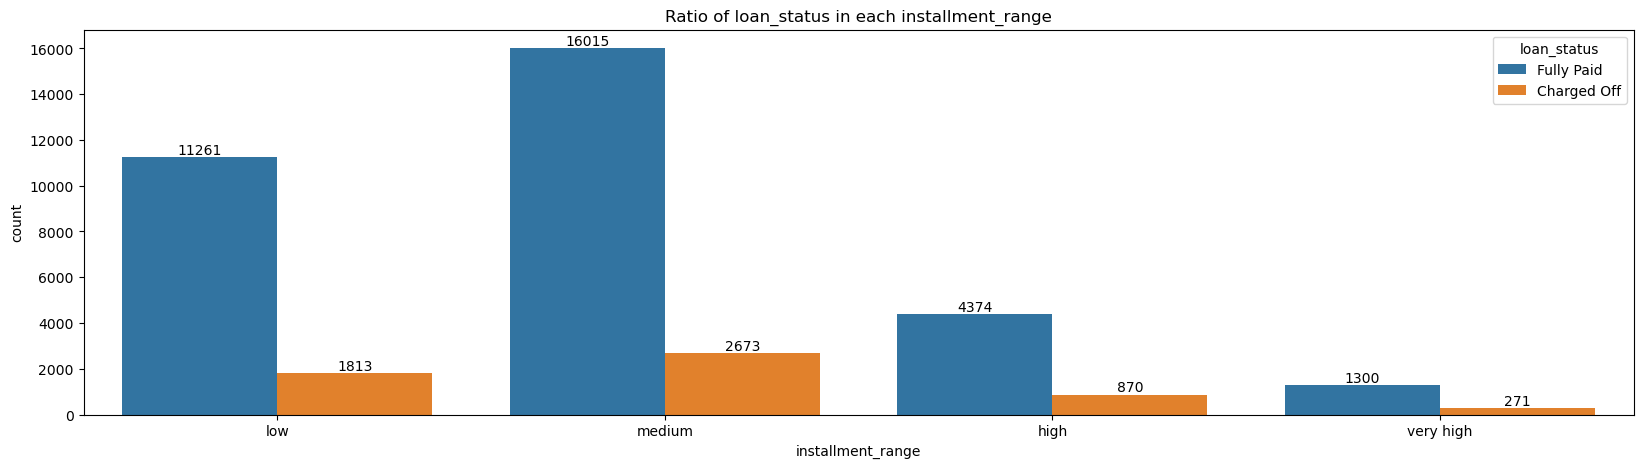

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts(normalize=True)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

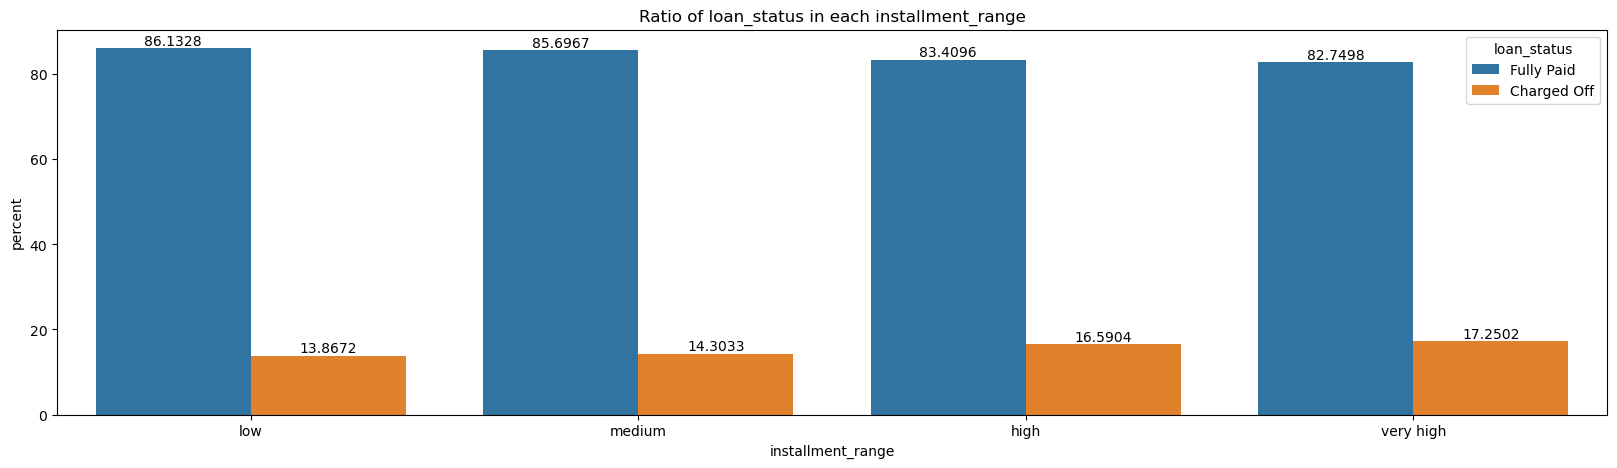

In [430]:
segmentedCatplot(loanData, "installment_range", "loan_status")

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts()
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

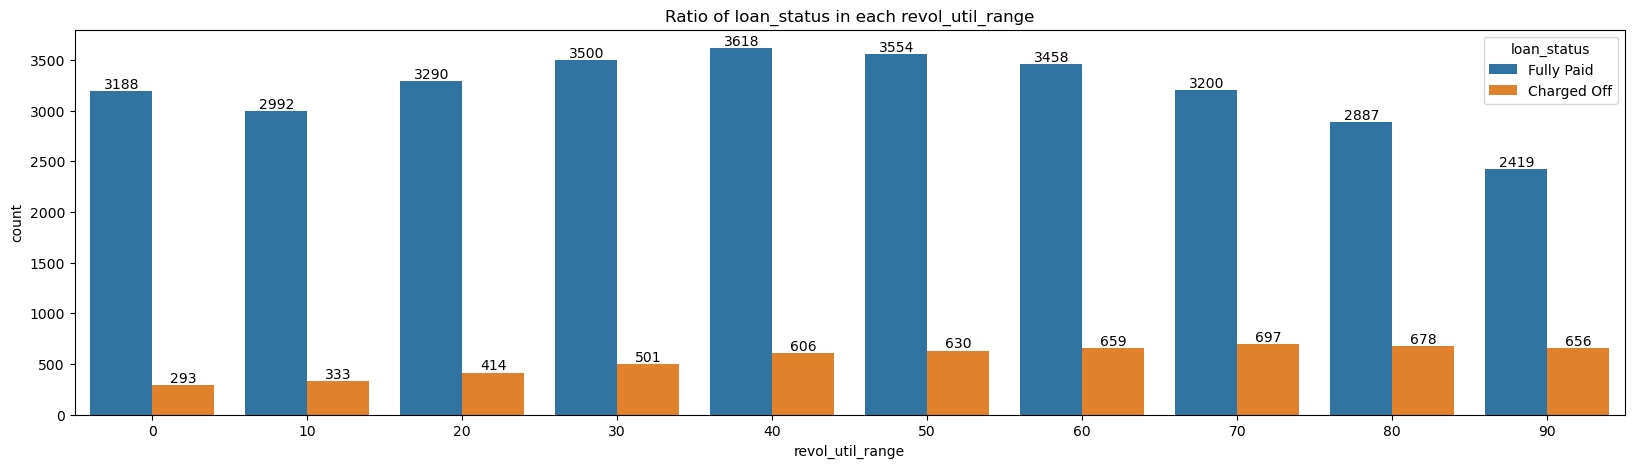

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts(normalize=True)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

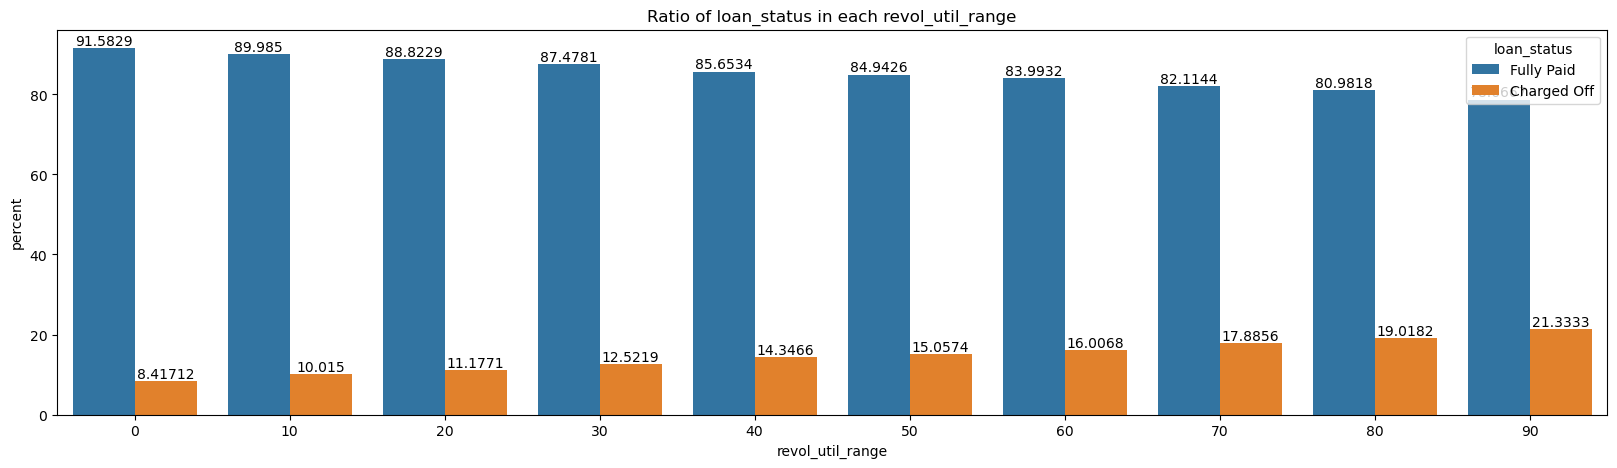

In [431]:
segmentedCatplot(loanData, "revol_util_range", "loan_status")

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts()
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

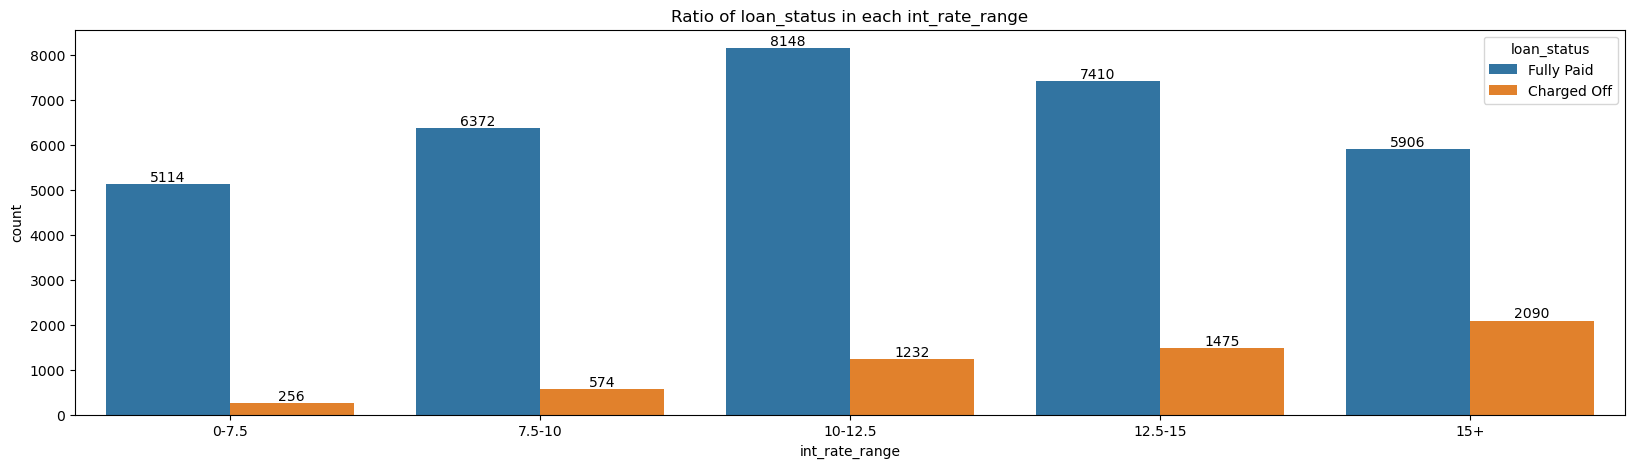

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts(normalize=True)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

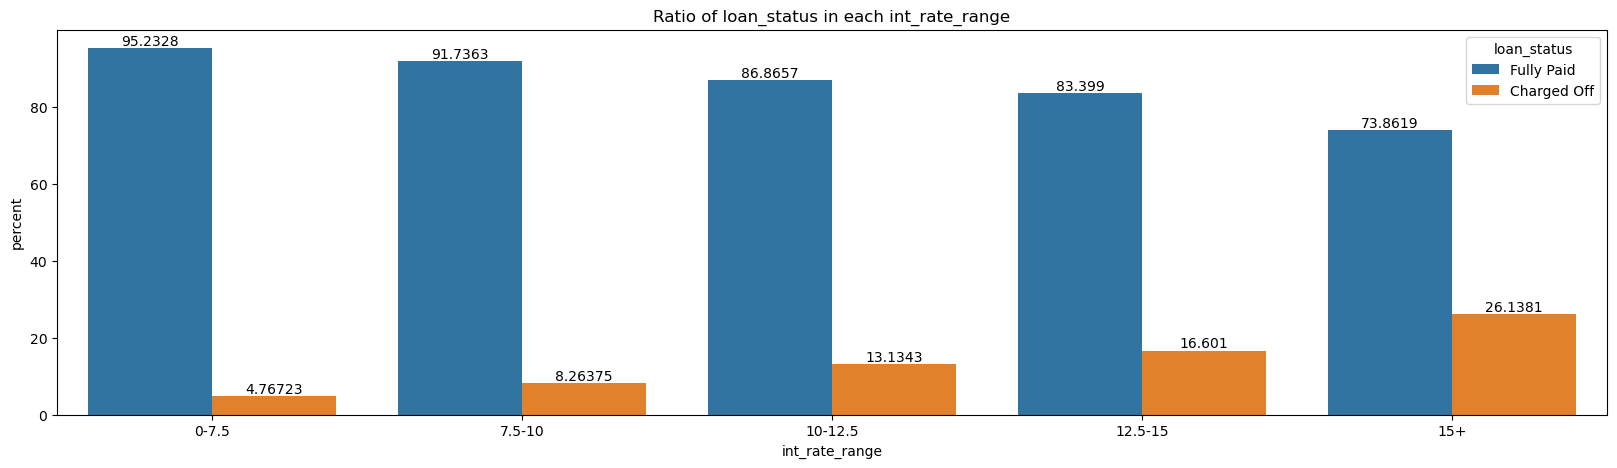

In [432]:
segmentedCatplot(loanData, "int_rate_range", "loan_status")

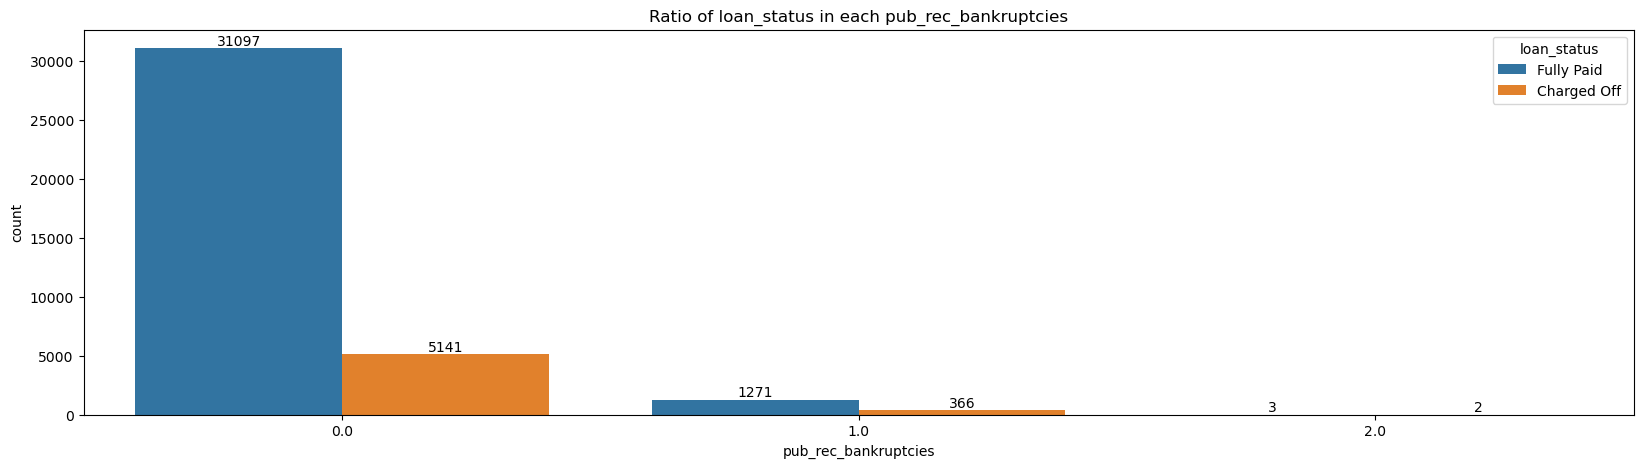

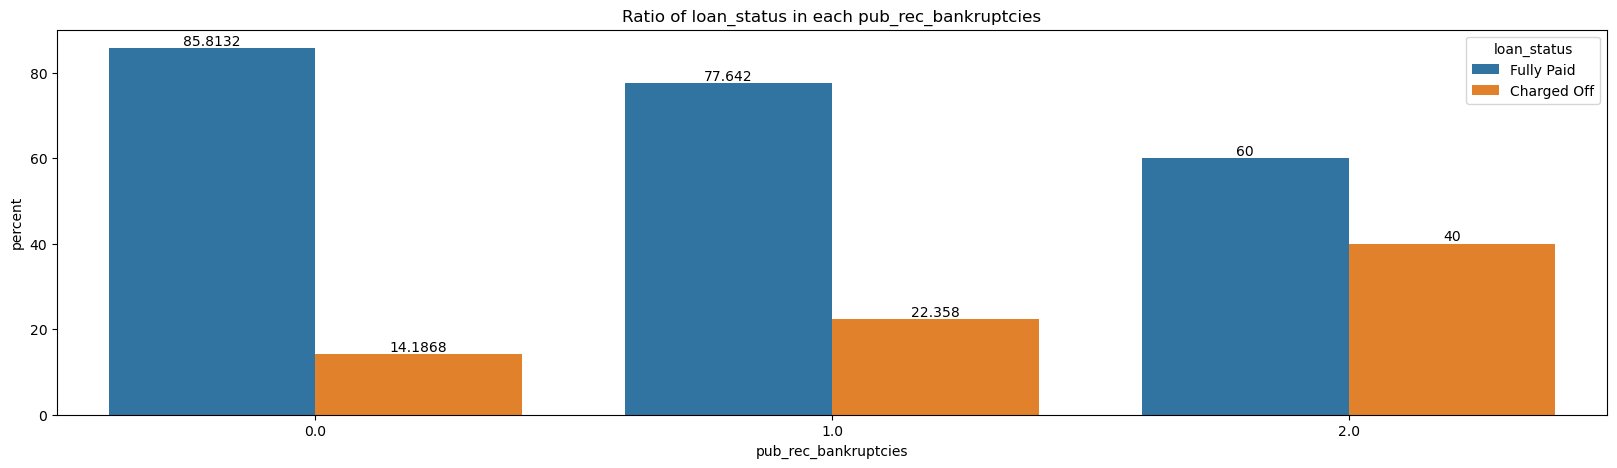

In [433]:
segmentedCatplot(loanData, "pub_rec_bankruptcies", "loan_status")

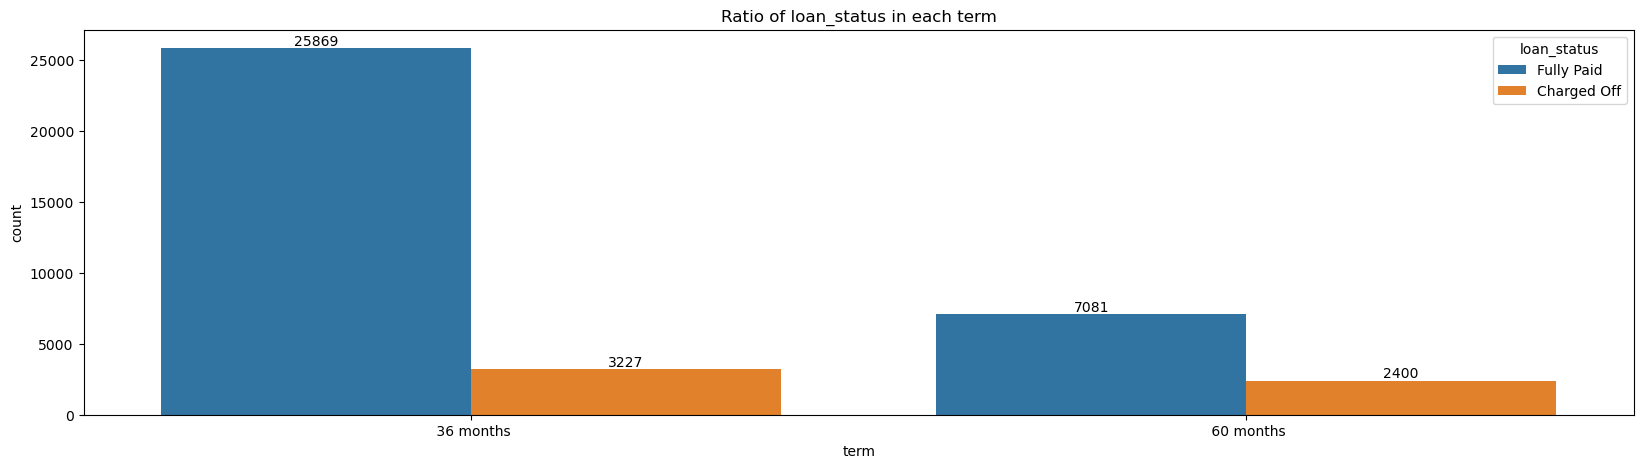

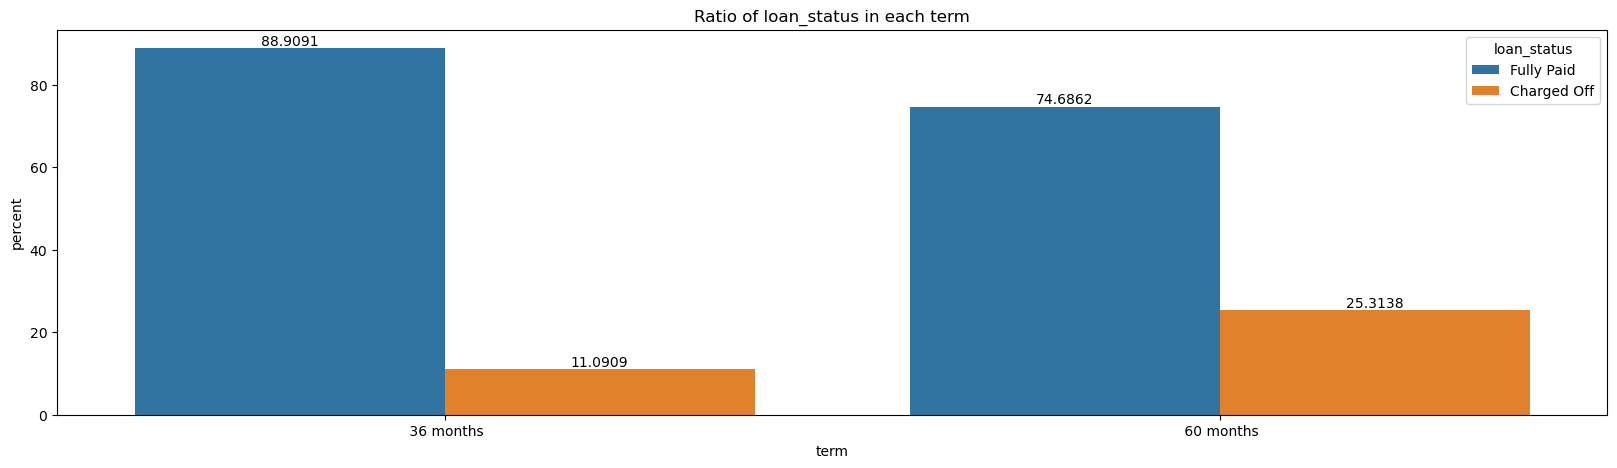

In [434]:
segmentedCatplot(loanData, "term", "loan_status")

25% chance of default in 60 months term

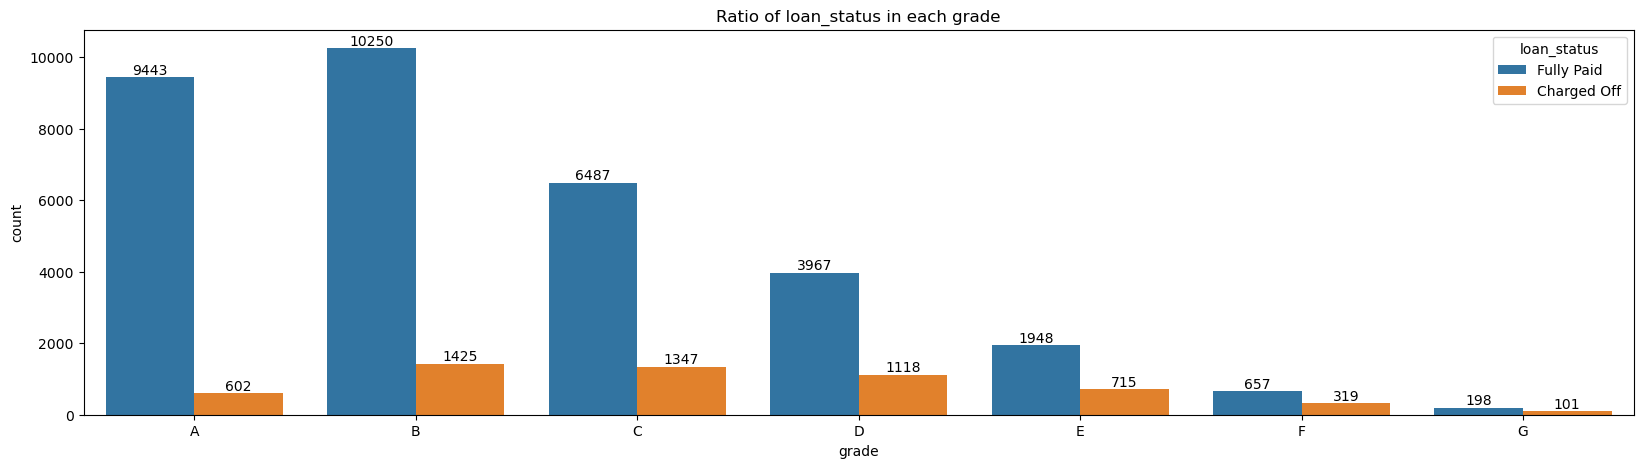

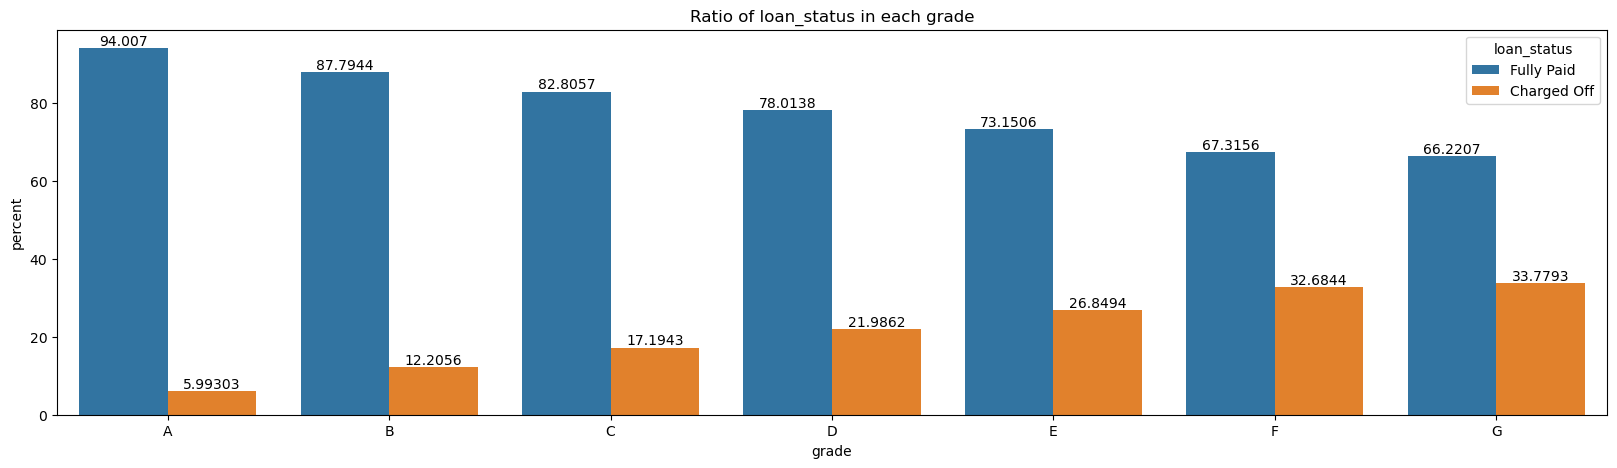

In [435]:

segmentedCatplot(loanData, "grade", "loan_status")

F and G has more than 30% chances of default

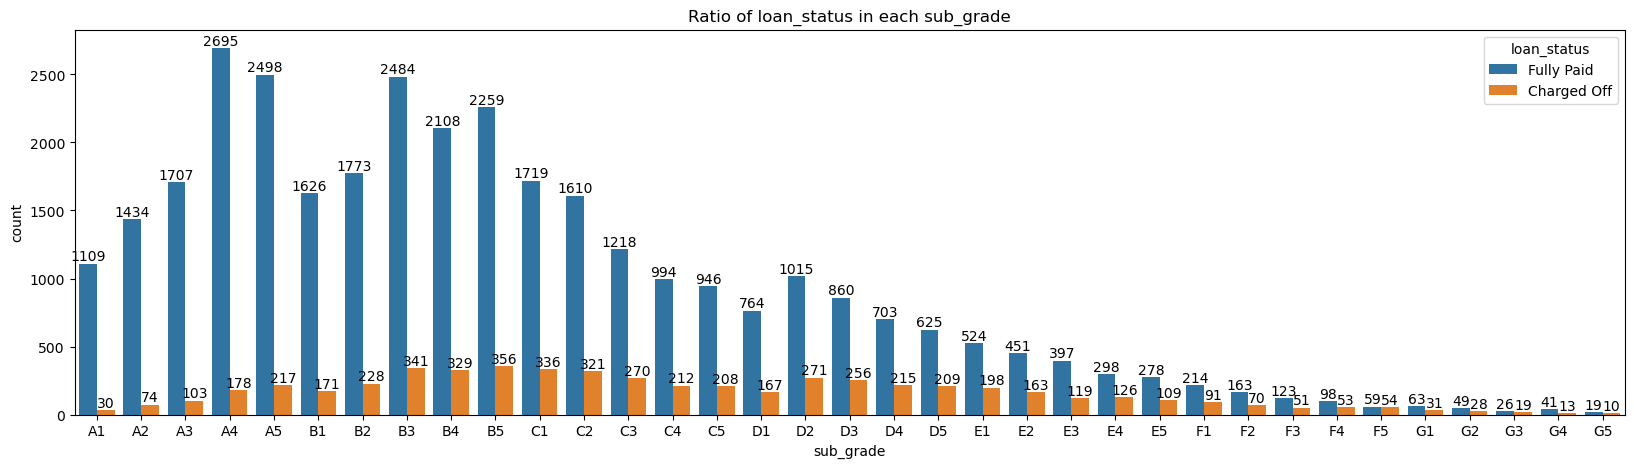

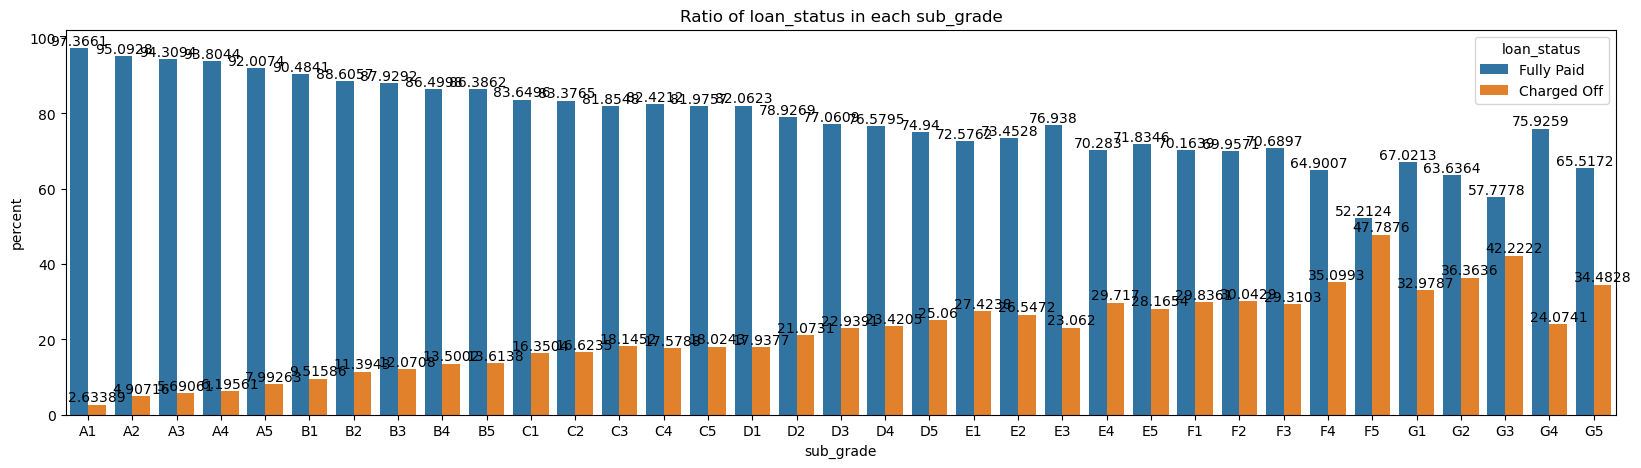

In [436]:
segmentedCatplot(loanData, "sub_grade", "loan_status")

F5 and G3 has more than 40% chances for default

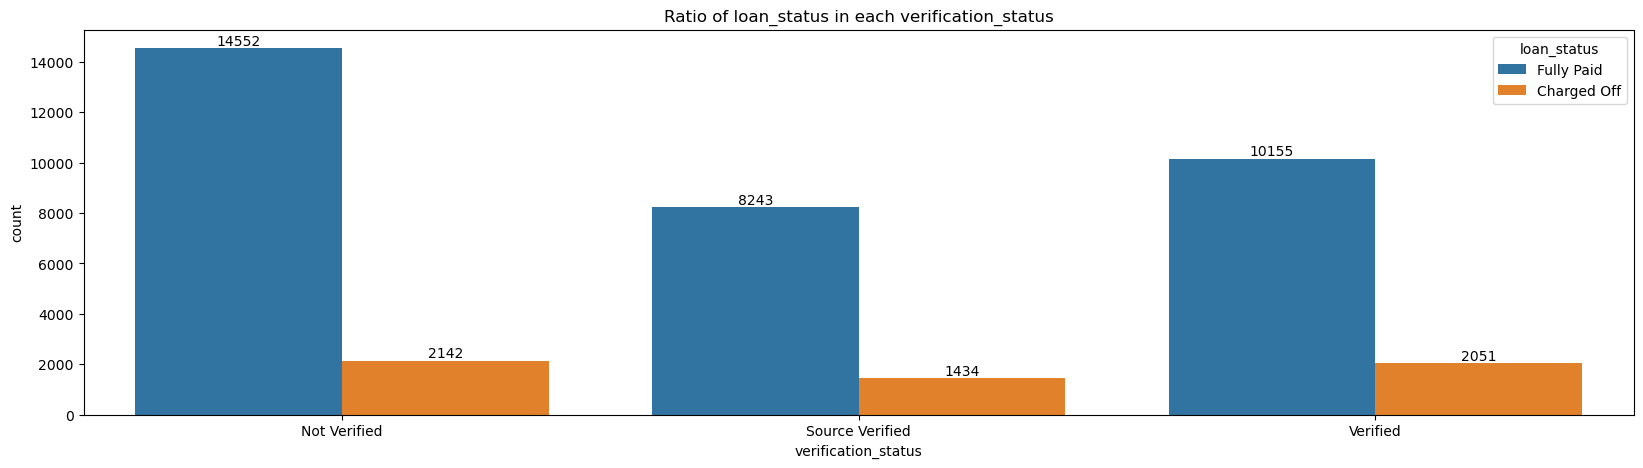

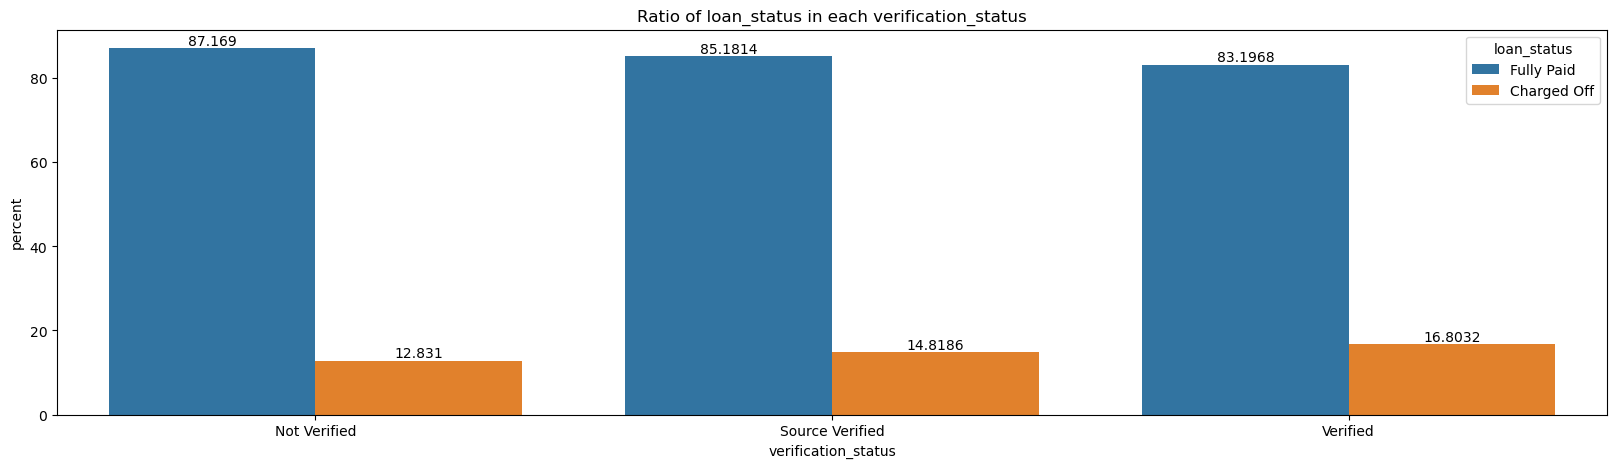

In [437]:
segmentedCatplot(loanData, "verification_status", "loan_status")

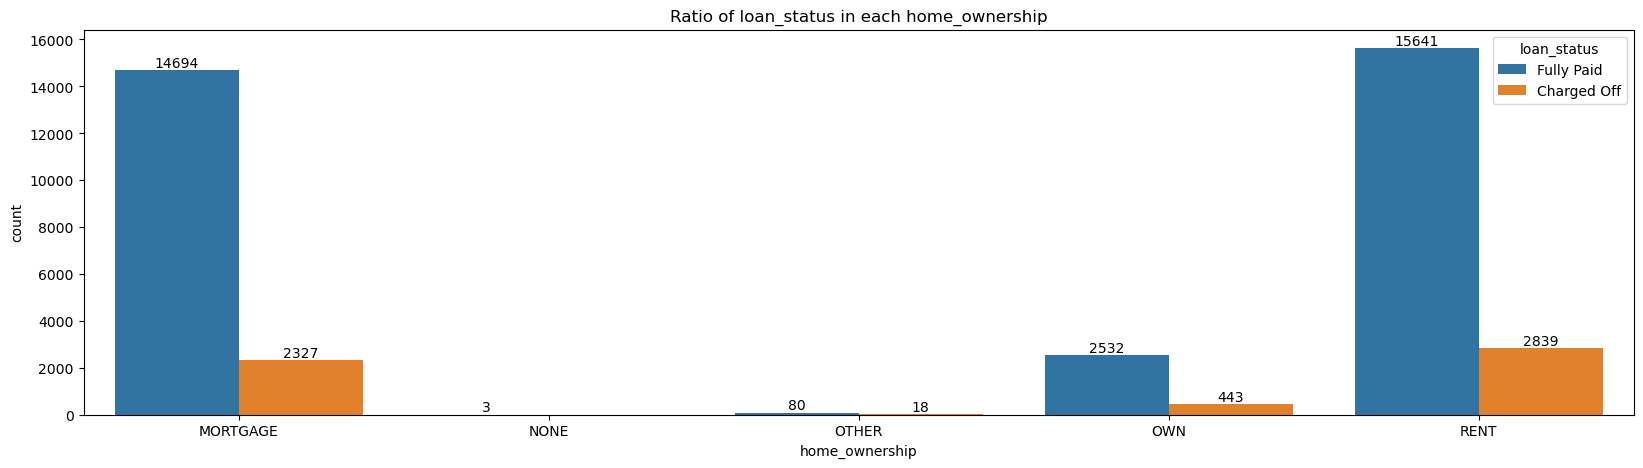

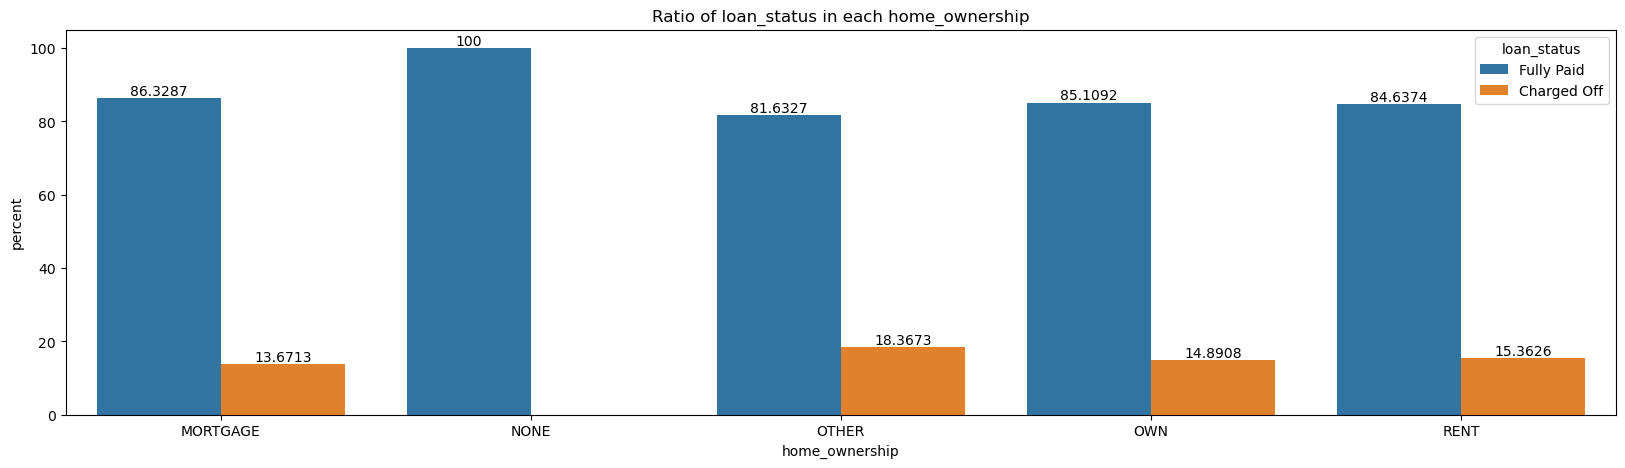

In [438]:
segmentedCatplot(loanData, "home_ownership", "loan_status")

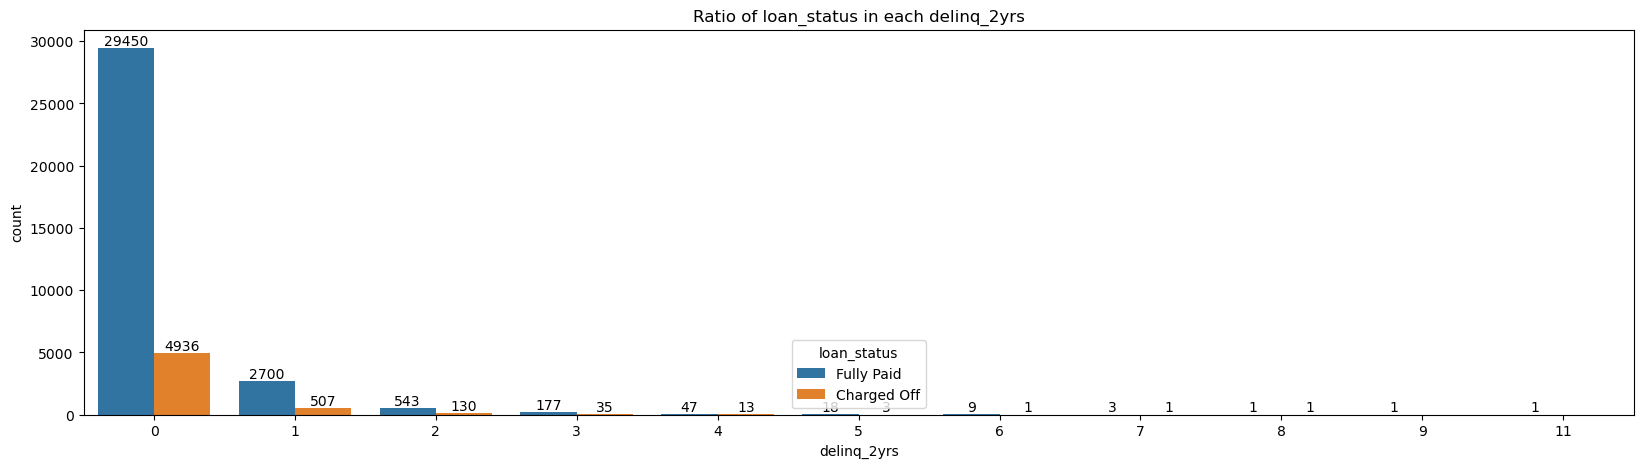

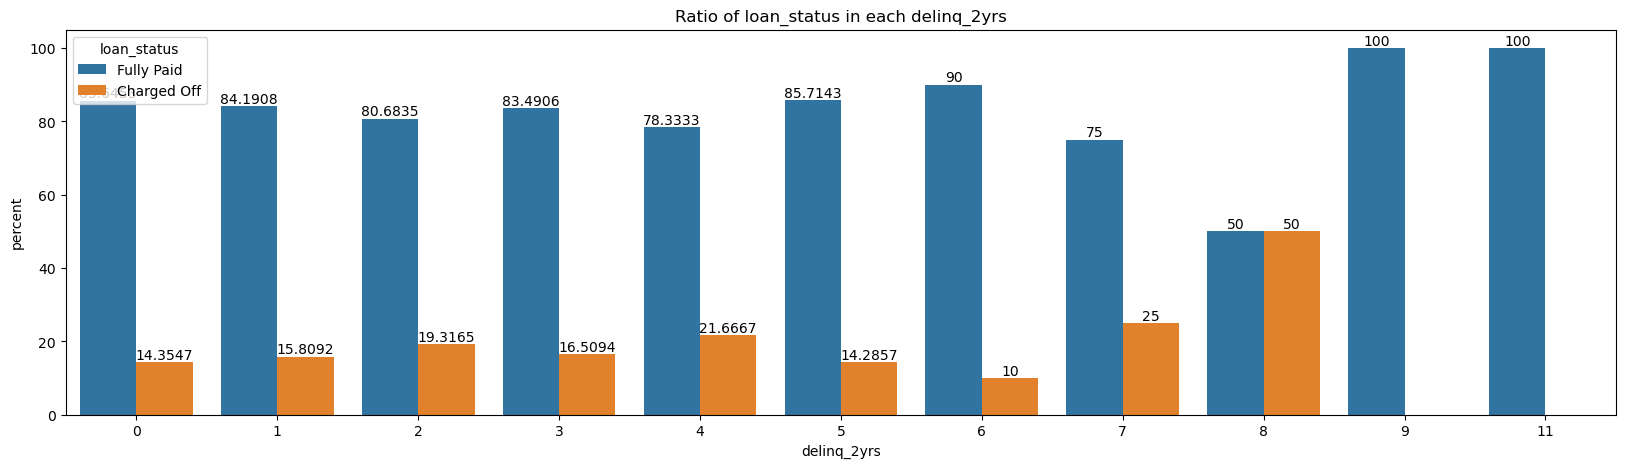

In [439]:
segmentedCatplot(loanData, "delinq_2yrs", "loan_status")


C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts()
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

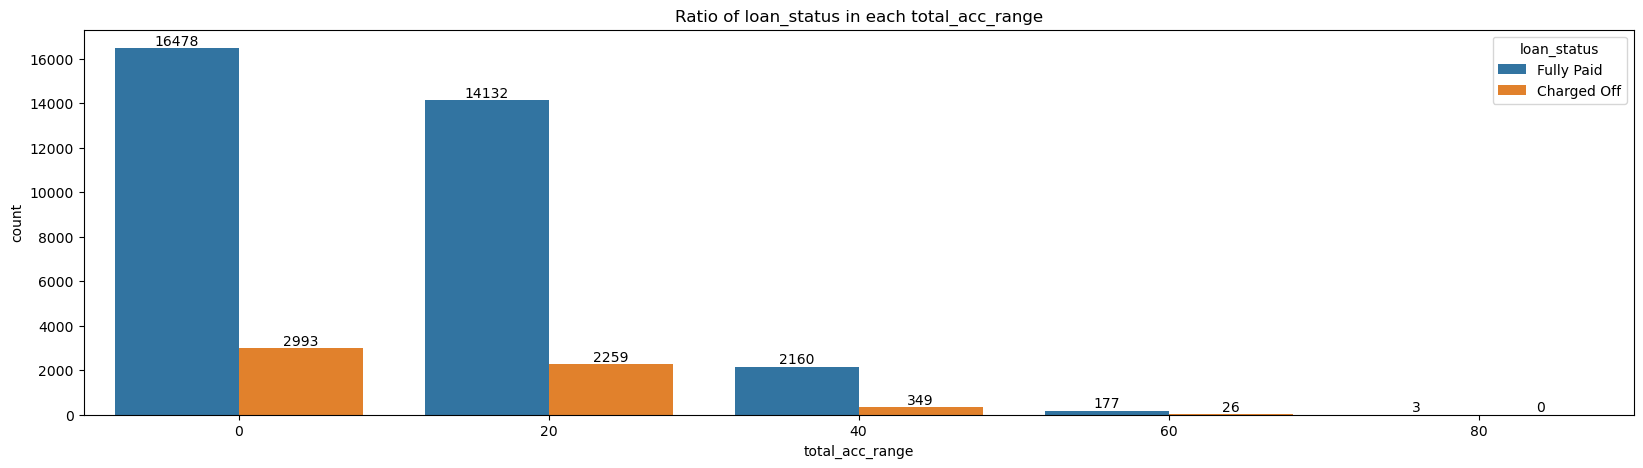

C:\Users\rajsv\AppData\Local\Temp\ipykernel_16152\2209341346.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = loan.groupby(x)[y].value_counts(normalize=True)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence th

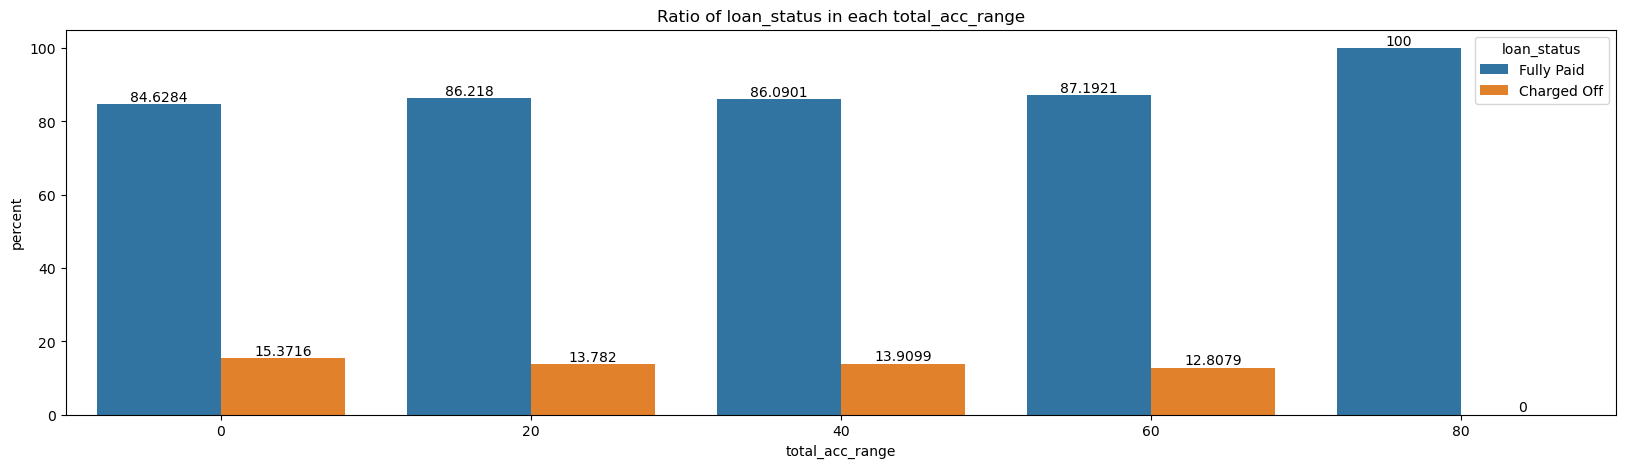

In [440]:
segmentedCatplot(loanData, "total_acc_range", "loan_status")


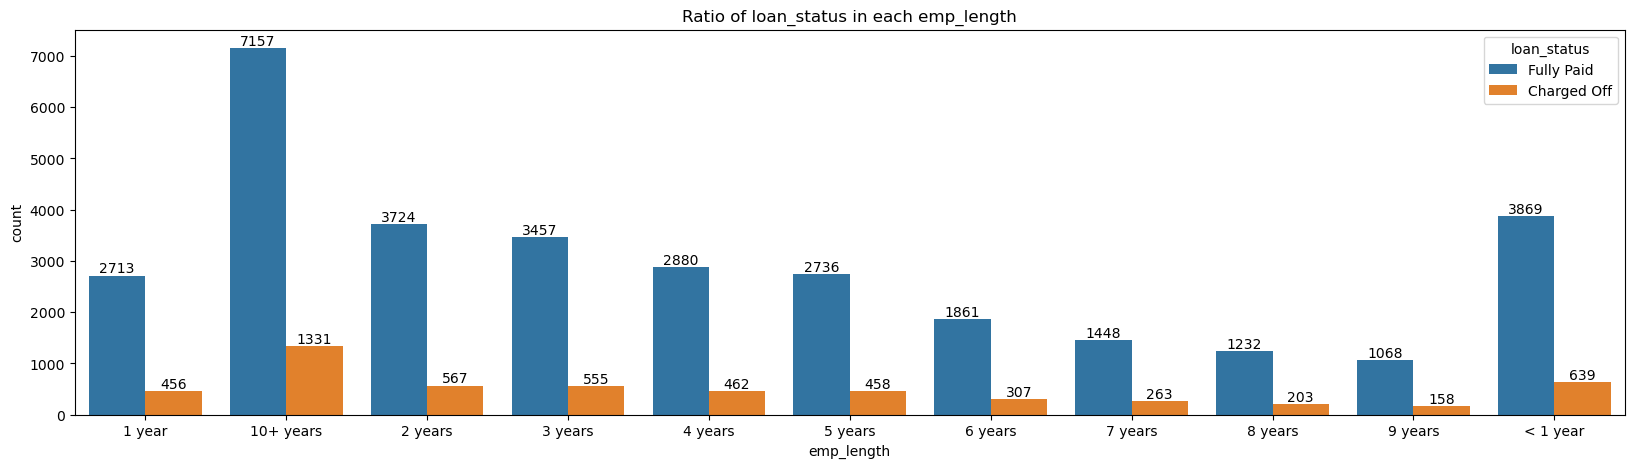

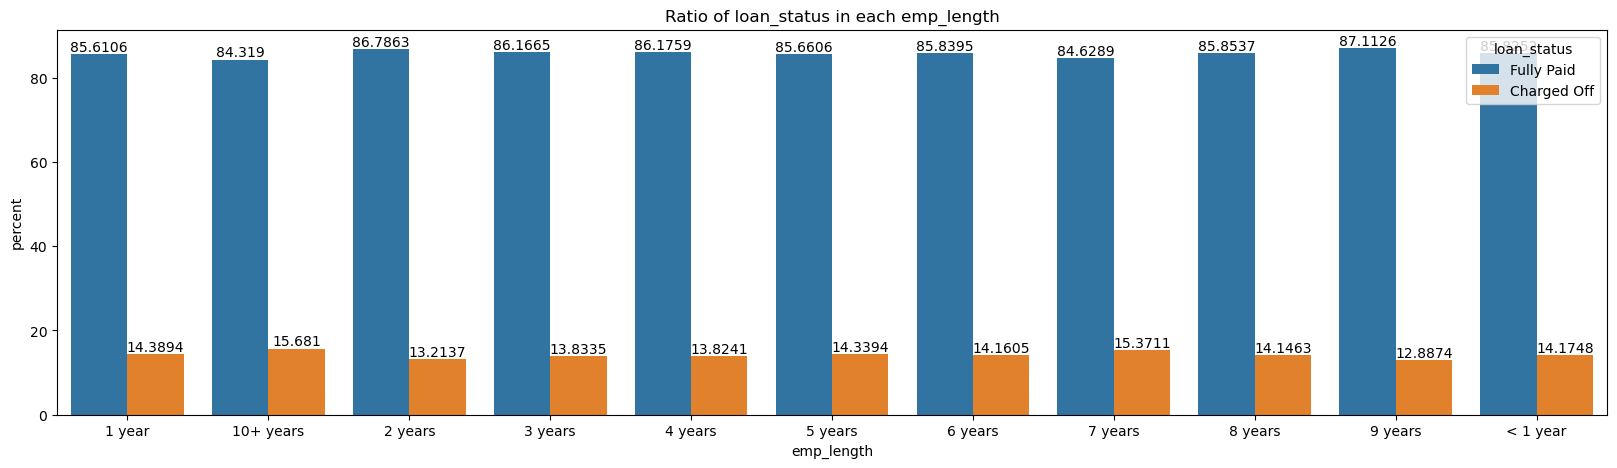

In [441]:

segmentedCatplot(loanData, "emp_length", "loan_status")

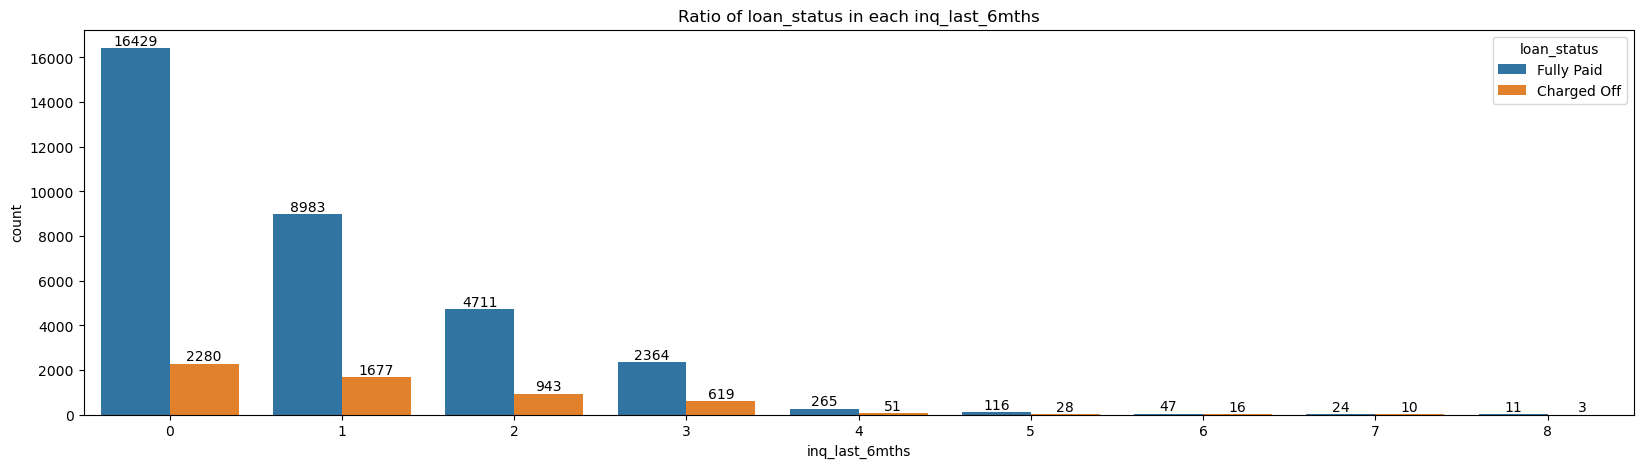

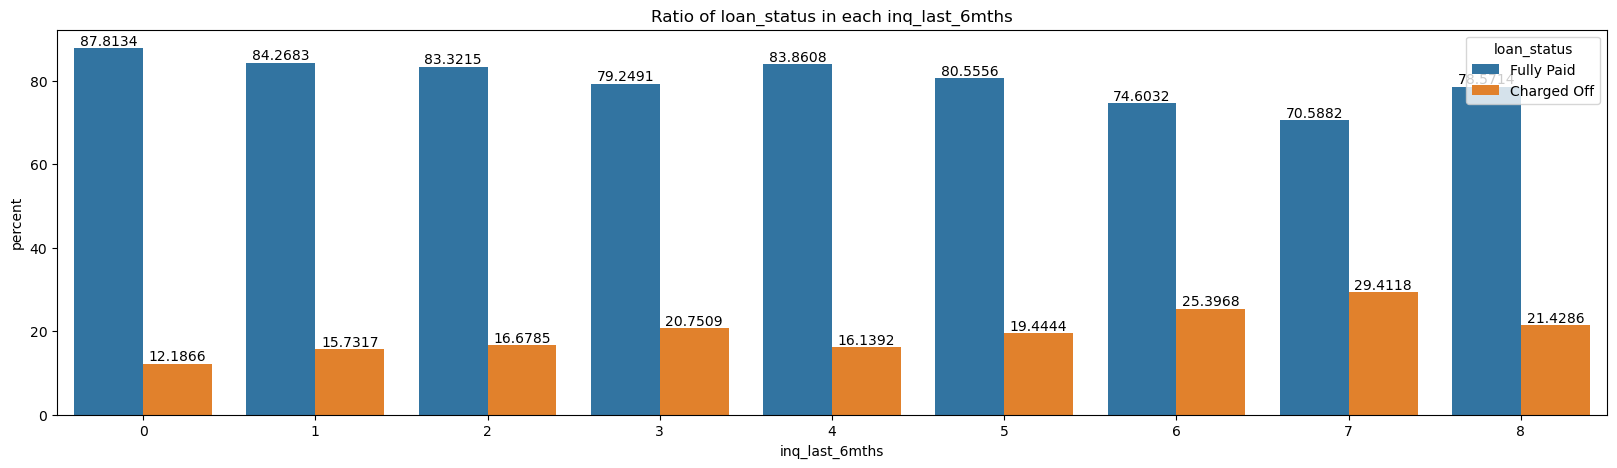

In [442]:
segmentedCatplot(loanData, "inq_last_6mths", "loan_status")


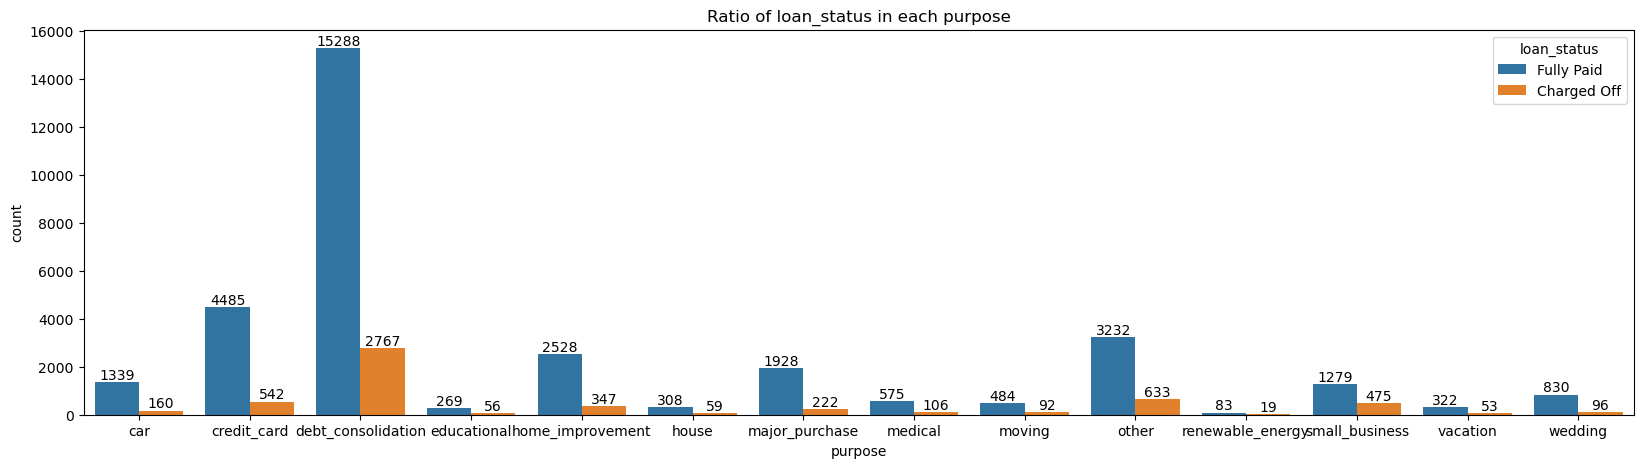

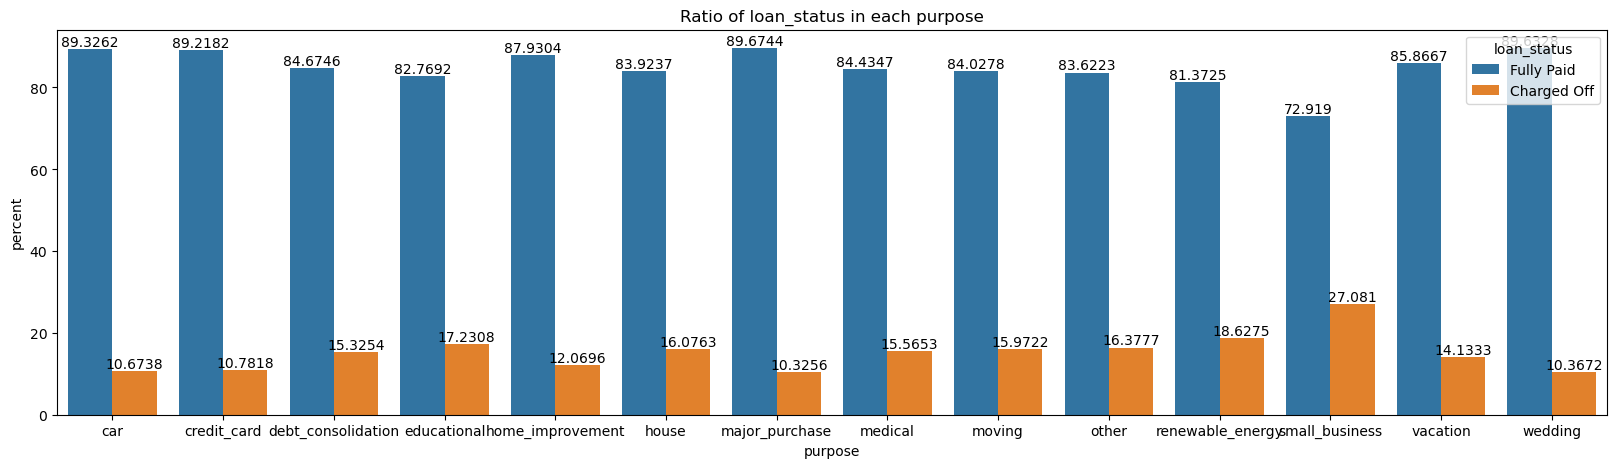

In [443]:
segmentedCatplot(loanData, "purpose", "loan_status")

Small business and renewable energy are top 2 of which renwable energy has low sampling.

# Univariate Analysis

In [444]:
def plotCountUnivariate(loan, x):
    plt.figure(figsize=(20,5))
    df1 = loan[x].value_counts()
    df1 = df1.rename('percent').reset_index()
    ax = sns.barplot(x=x,y='percent',data=df1)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"Count plot of {x}")
    plt.show()

def plotCatPercentageUnivariate(loan, x):
    plt.figure(figsize=(20,5))
    df1 = loan[x].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    ax = sns.barplot(x=x,y='percent',data=df1)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f"Plot of % distrution across each {x}")
    plt.show()

def plotCatCountAndPercentageUnivaraite(loan, x):
    plotCatPercentageUnivariate(loan, x)
    plotCountUnivariate(loan, x)

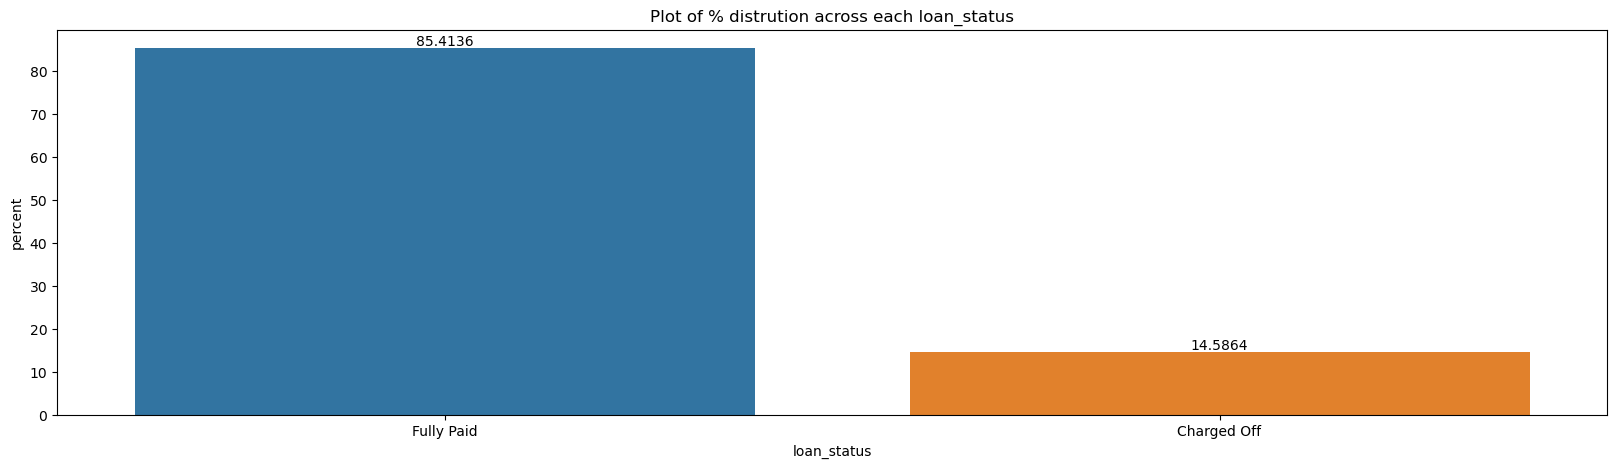

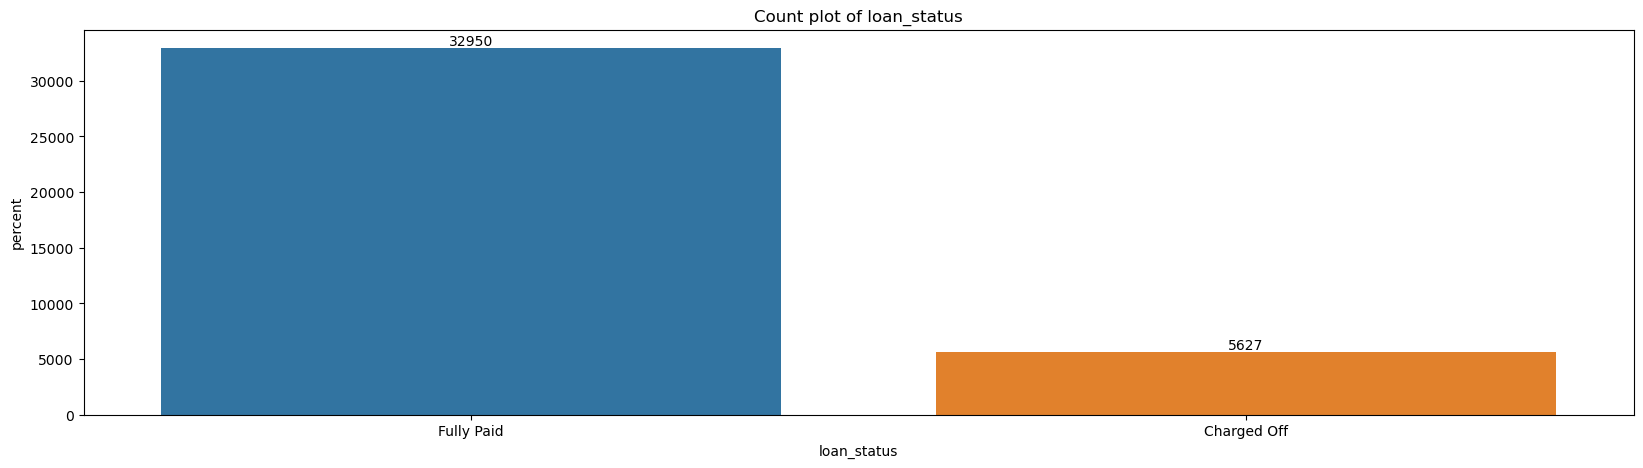

In [445]:
plotCatCountAndPercentageUnivaraite(loanData, "loan_status")

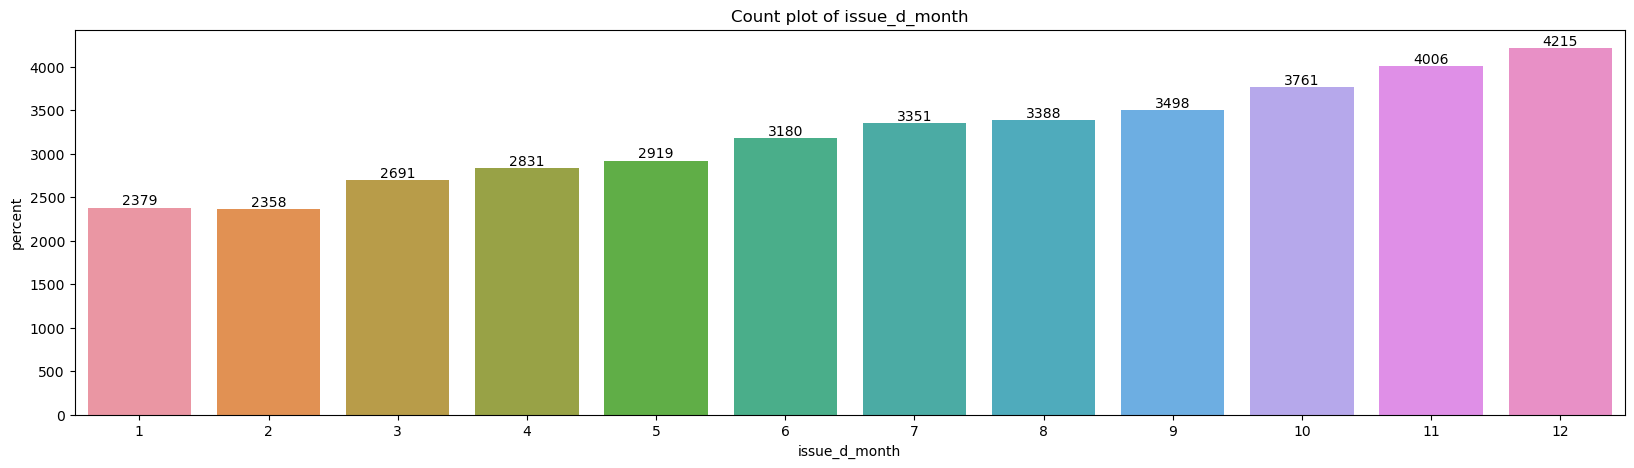

In [446]:
plotCountUnivariate(loanData, "issue_d_month")

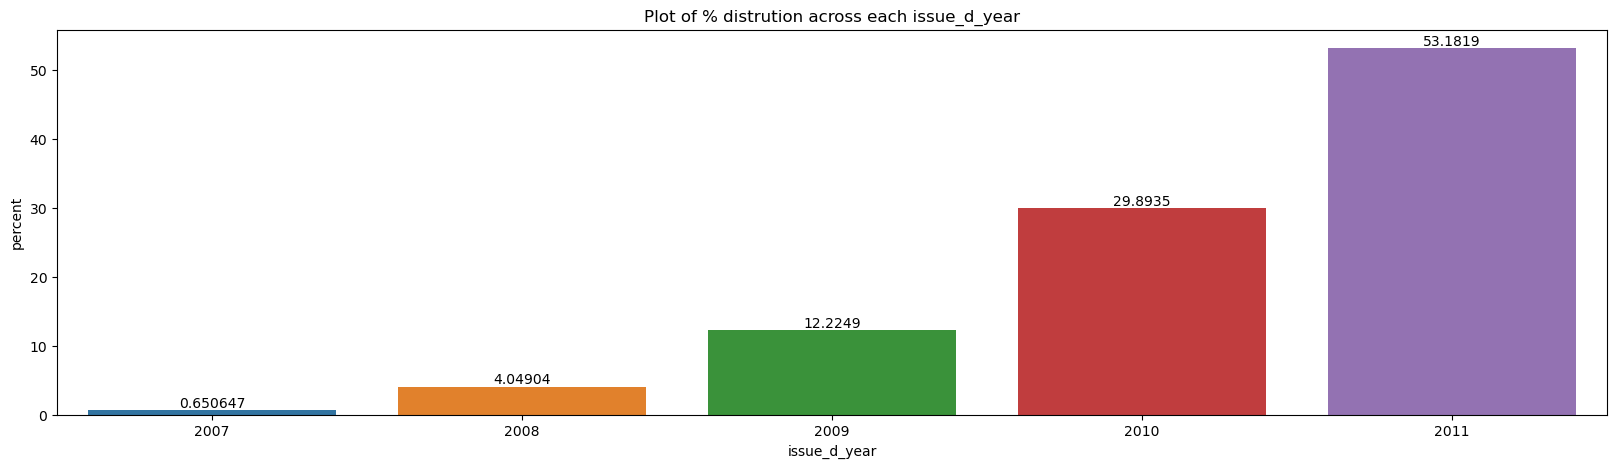

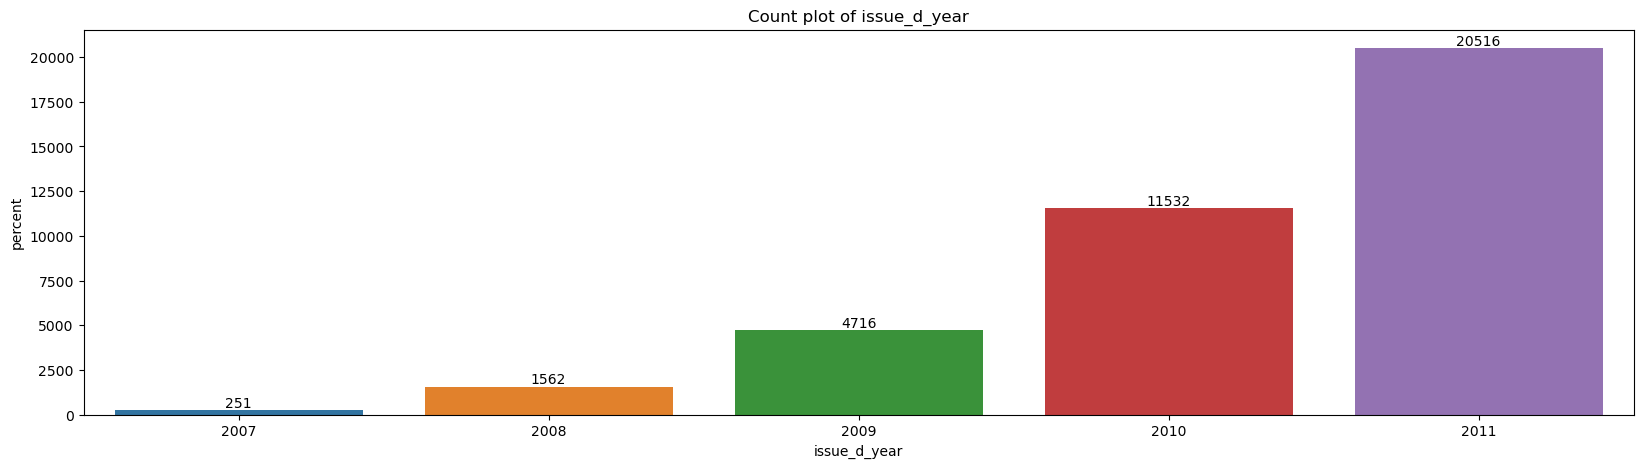

In [447]:
plotCatCountAndPercentageUnivaraite(loanData, "issue_d_year")

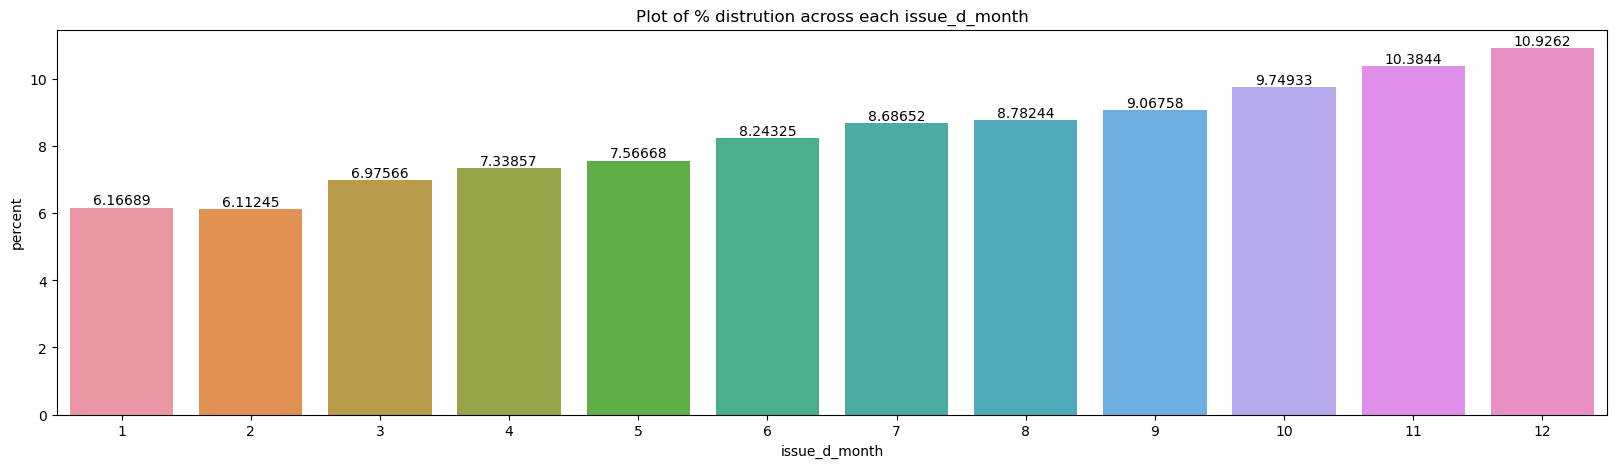

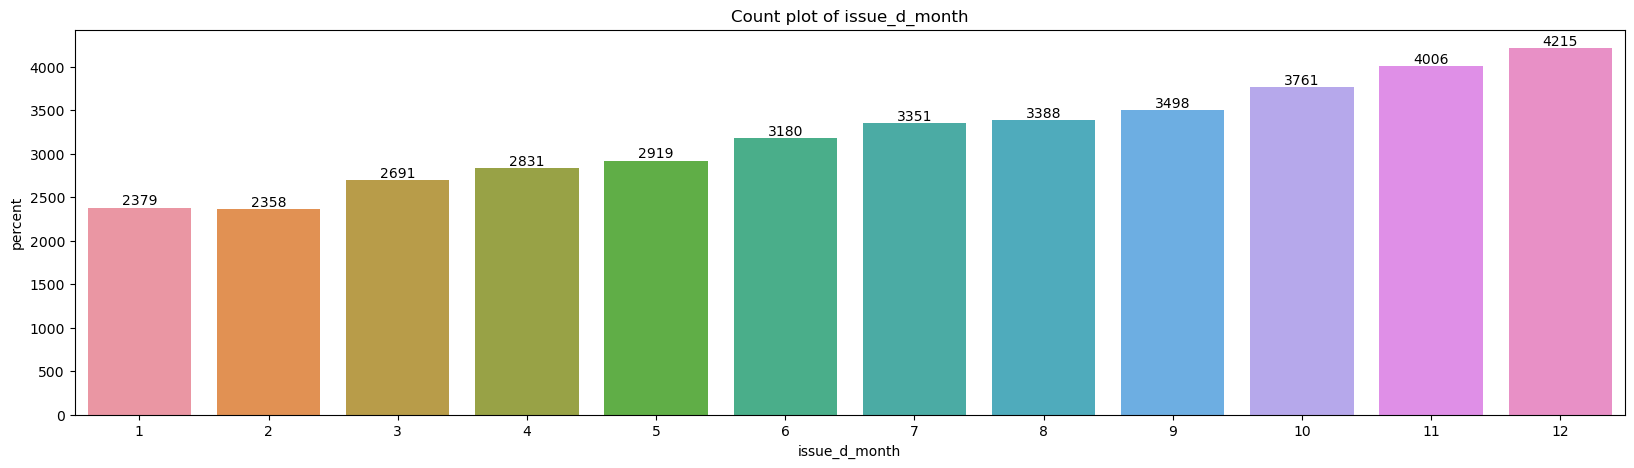

In [448]:
plotCatCountAndPercentageUnivaraite(loanData, "issue_d_month")

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


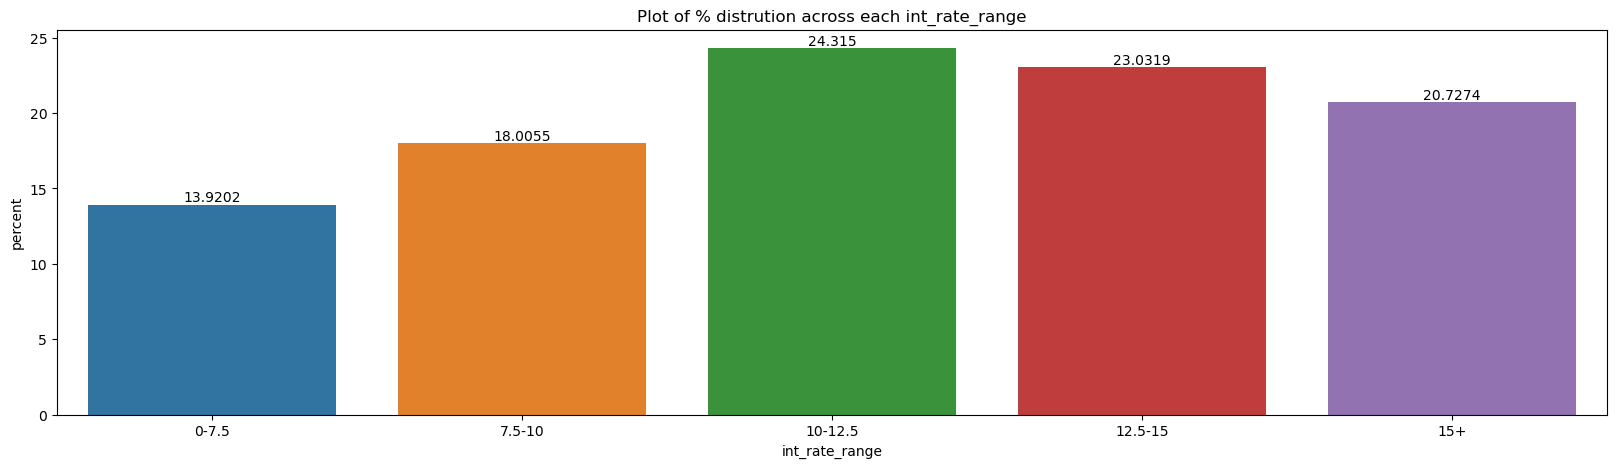

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


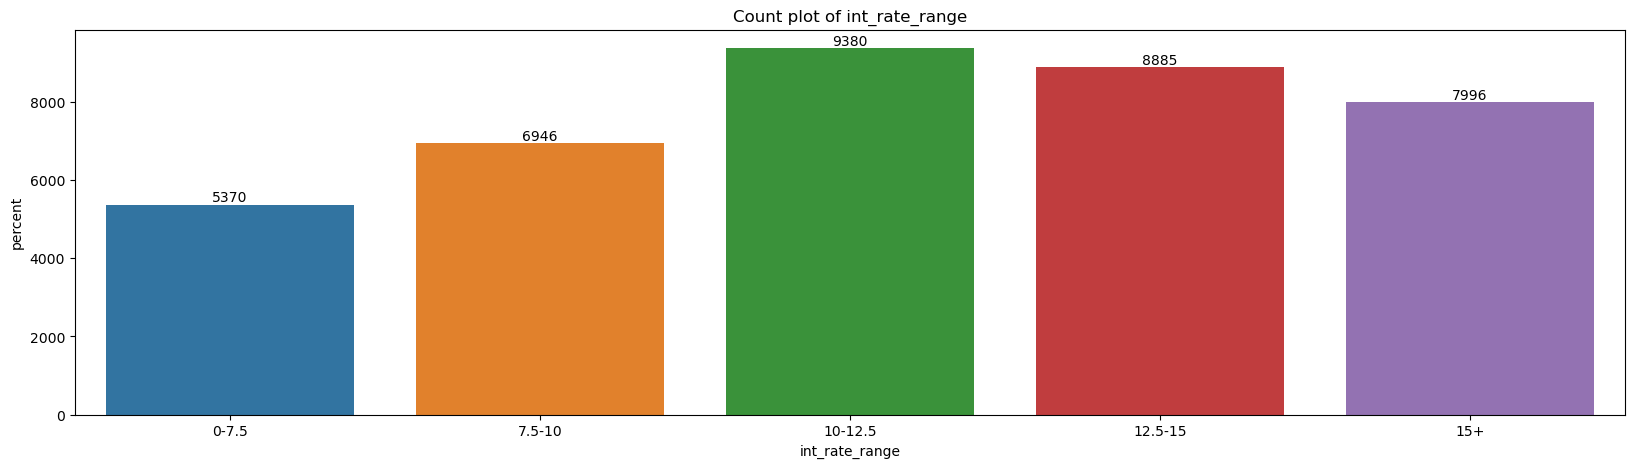

In [449]:
plotCatCountAndPercentageUnivaraite(loanData, "int_rate_range")

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


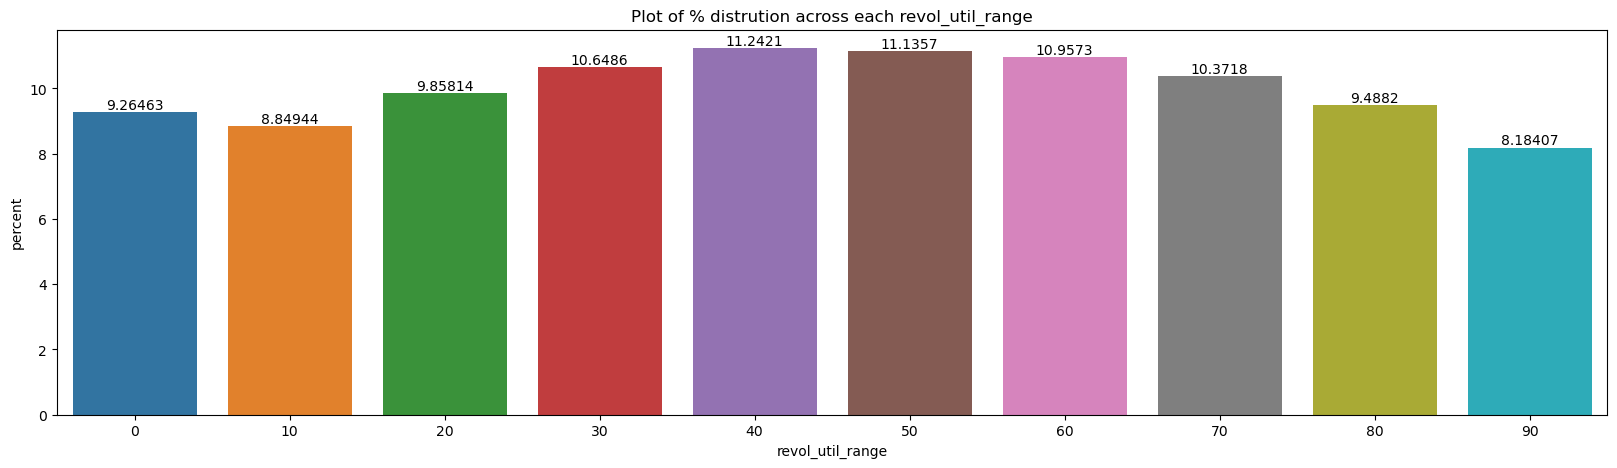

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


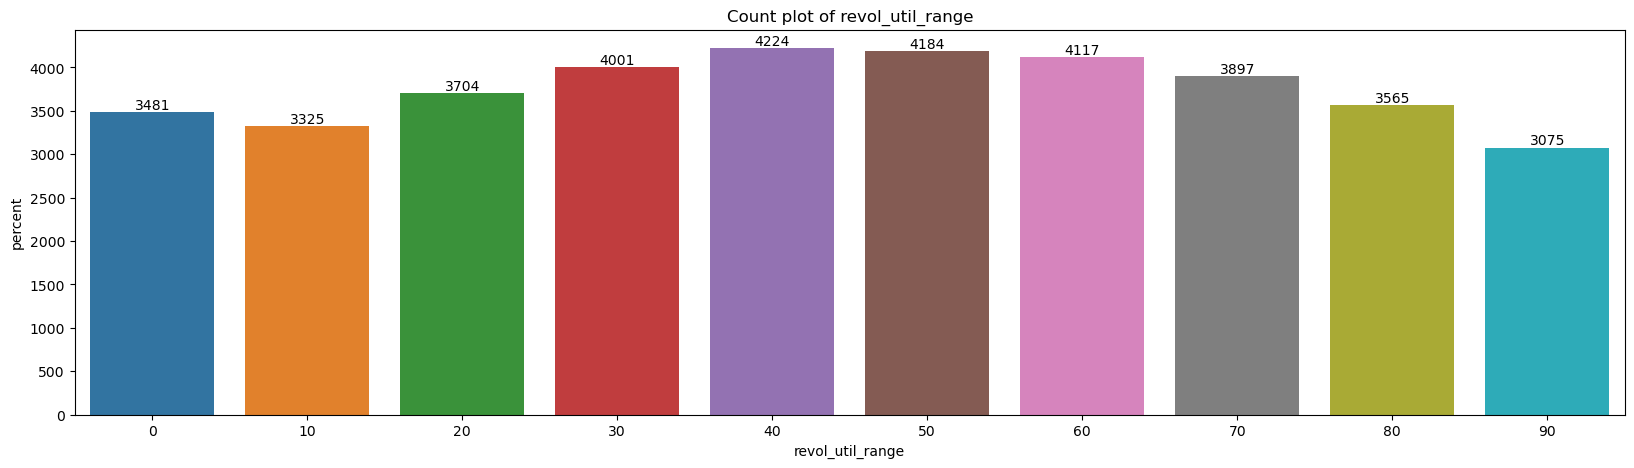

In [450]:
plotCatCountAndPercentageUnivaraite(loanData, "revol_util_range")

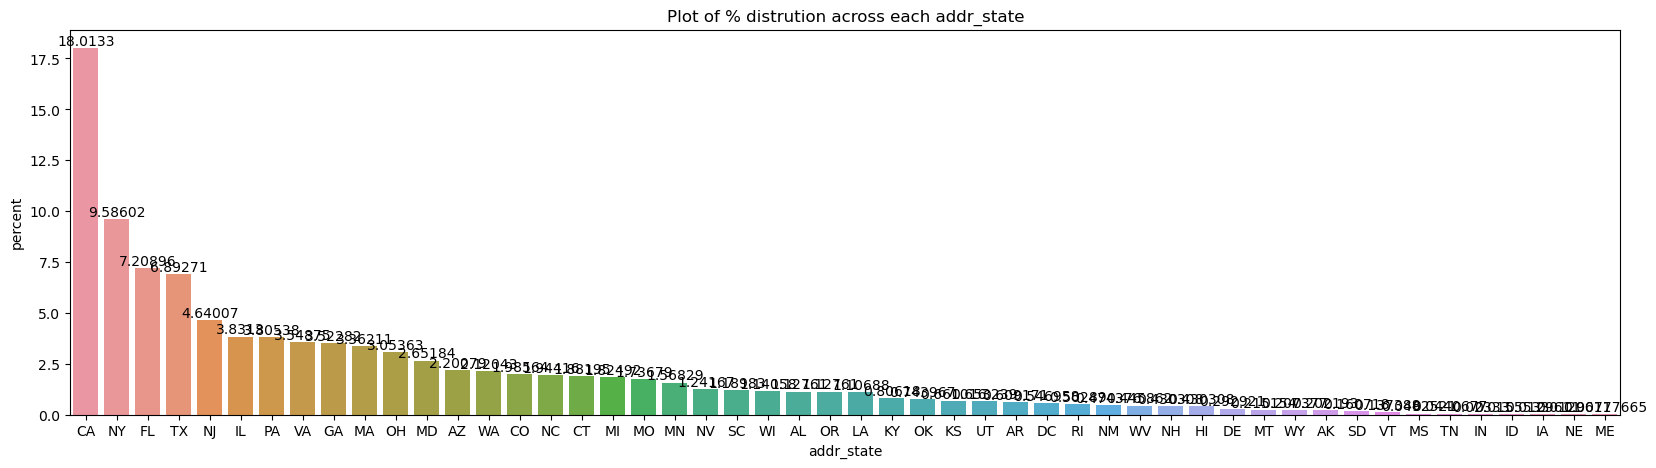

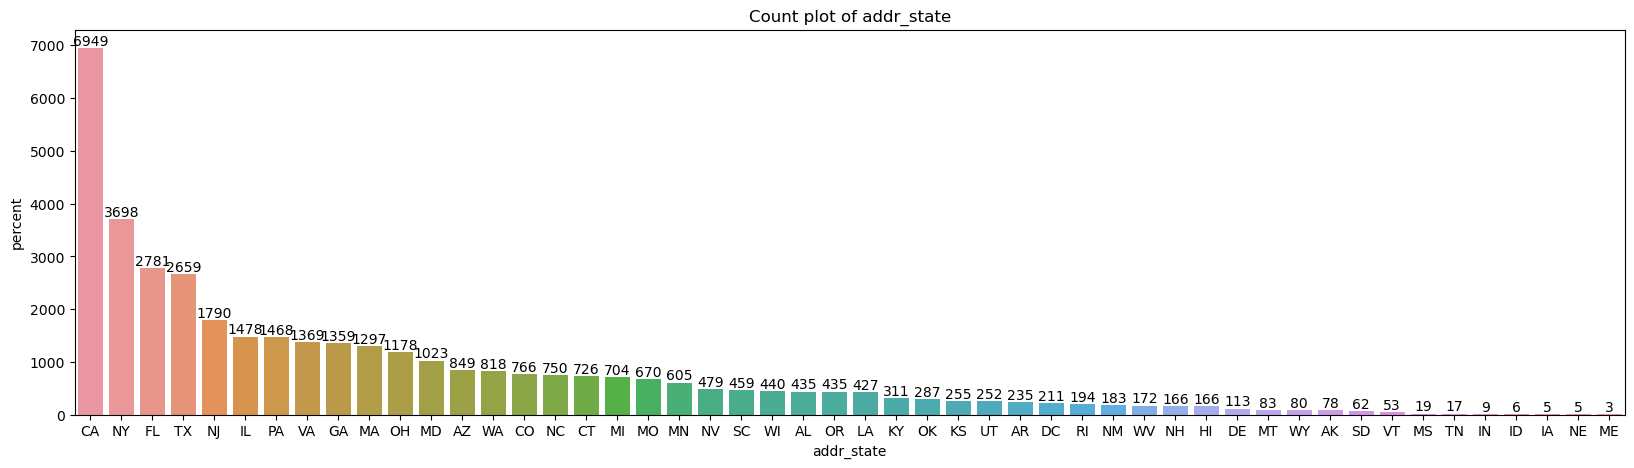

In [451]:
plotCatCountAndPercentageUnivaraite(loanData, "addr_state")


CA Lead the loans issued far more than any other states.

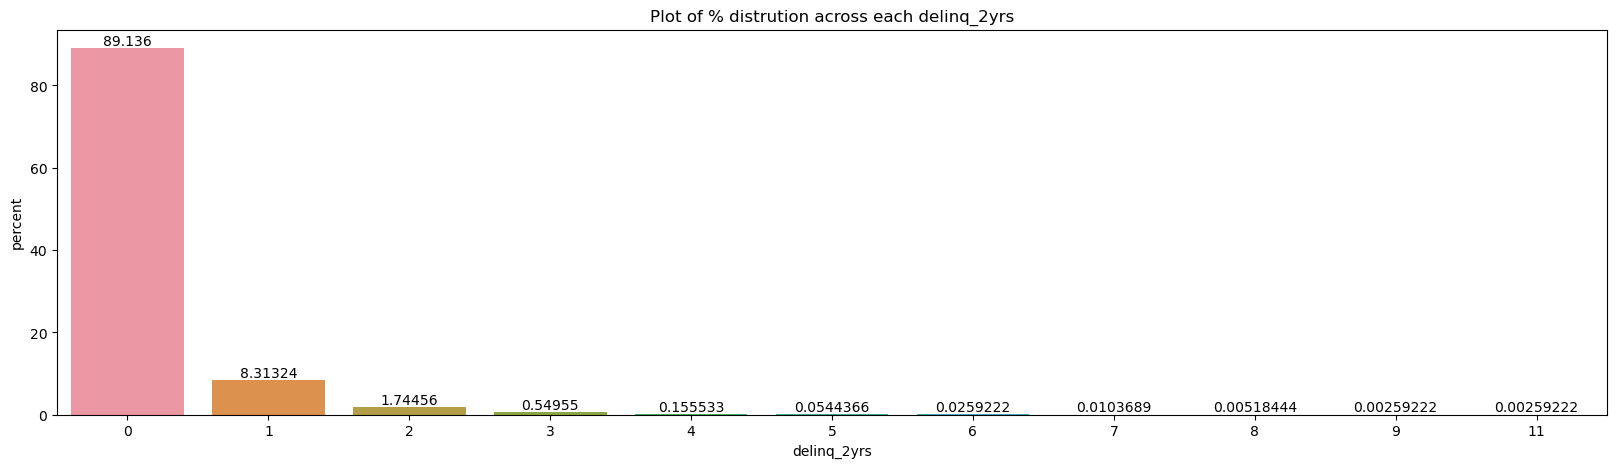

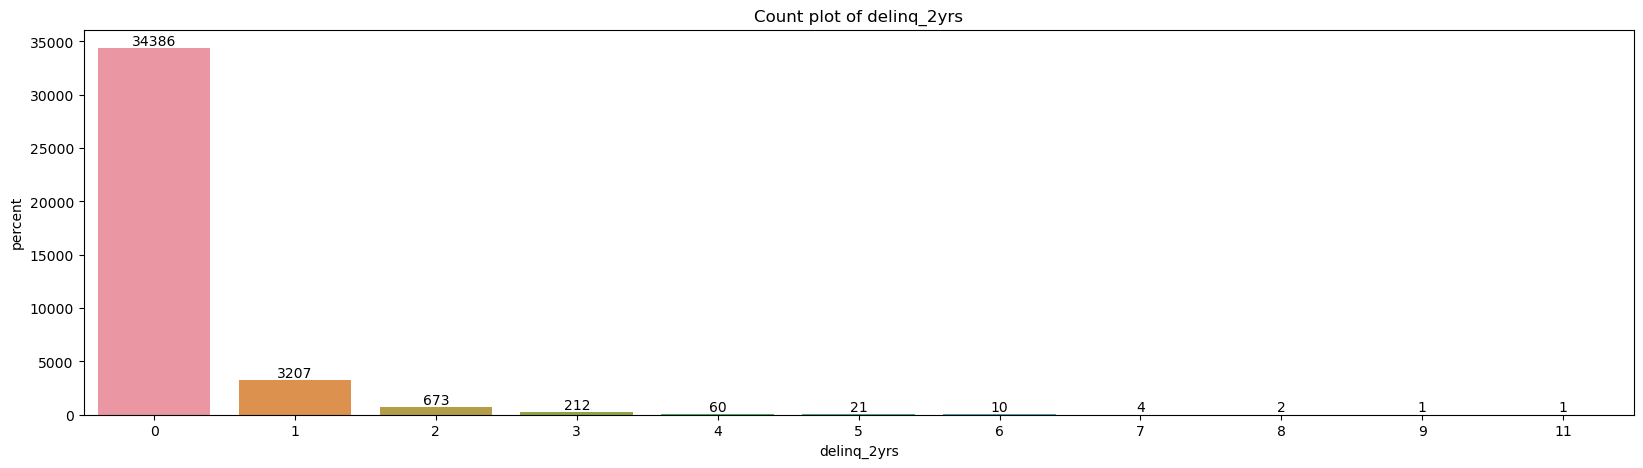

In [452]:
plotCatCountAndPercentageUnivaraite(loanData, "delinq_2yrs")

Not able to see much delinq is majority of the case.

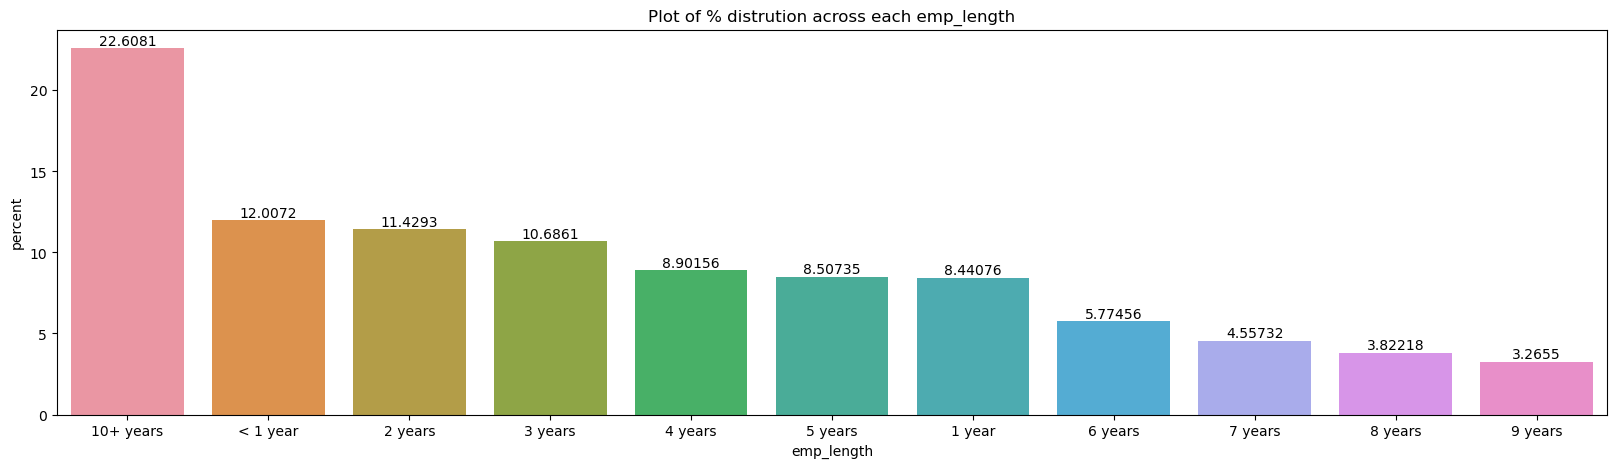

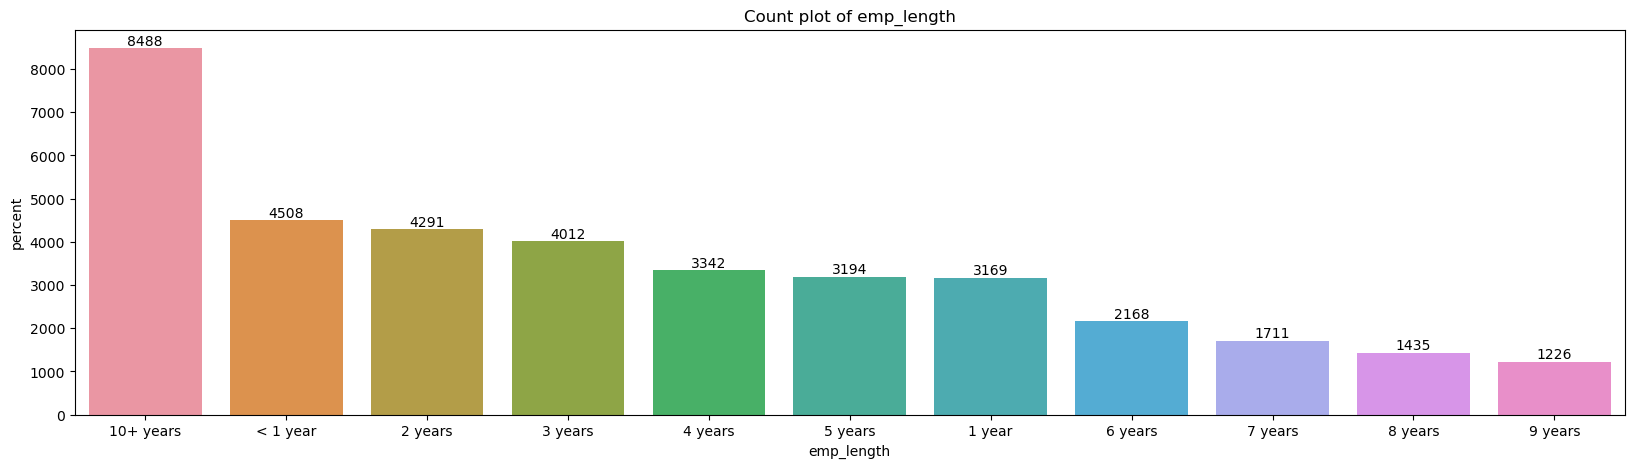

In [453]:
plotCatCountAndPercentageUnivaraite(loanData, "emp_length")

We can see peak value is 10

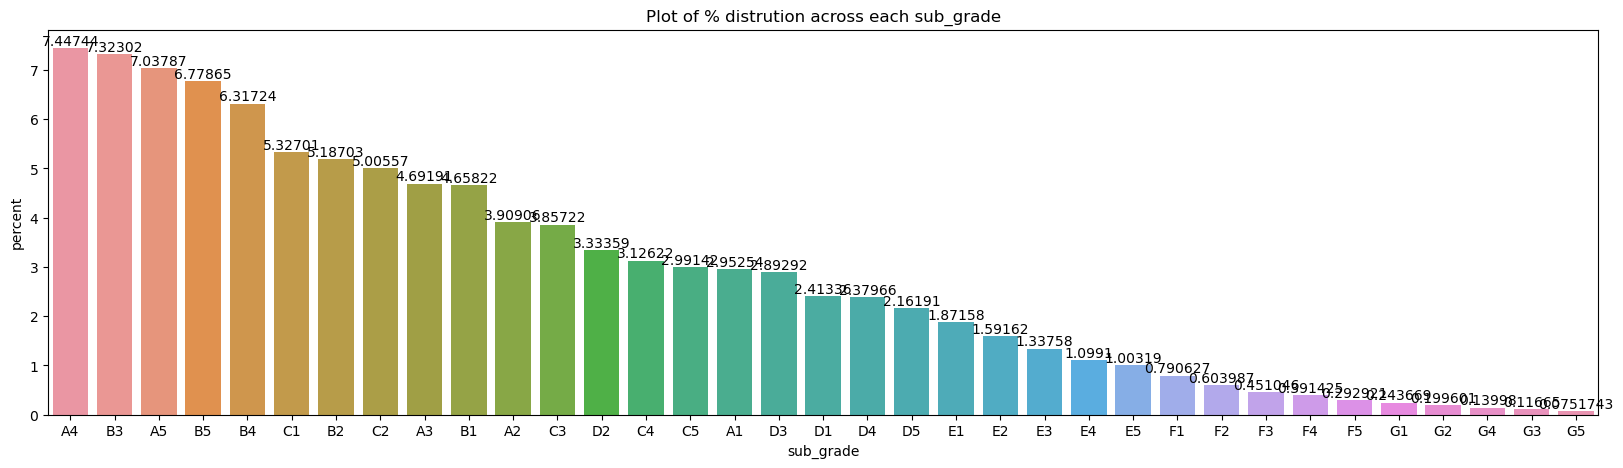

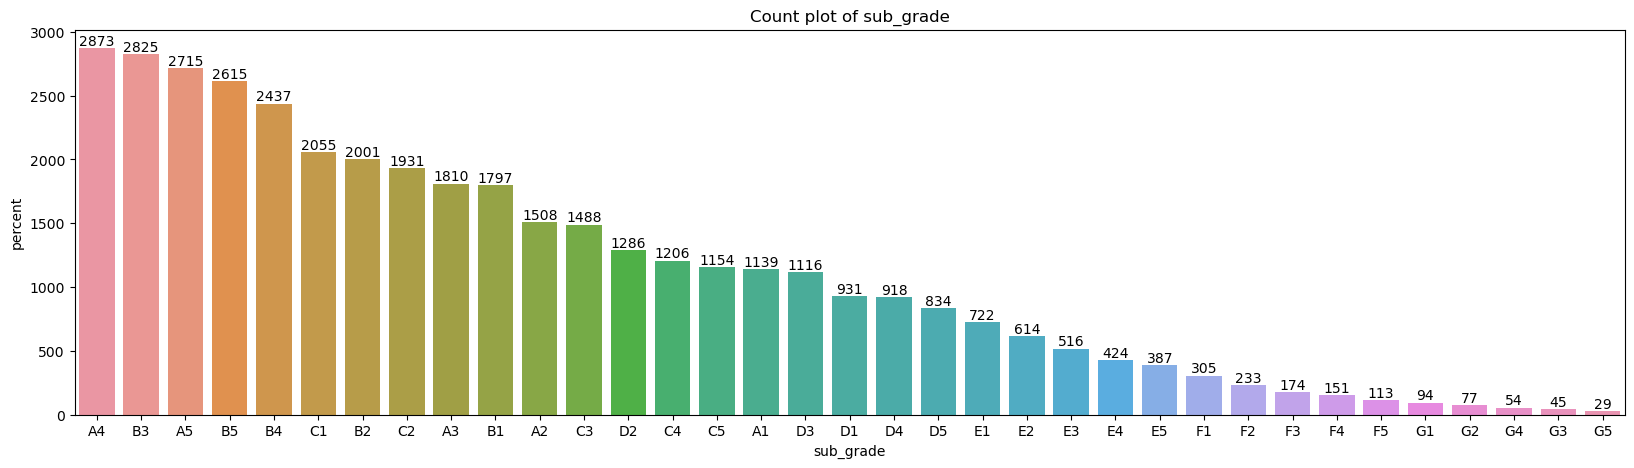

In [454]:
plotCatCountAndPercentageUnivaraite(loanData, "sub_grade")

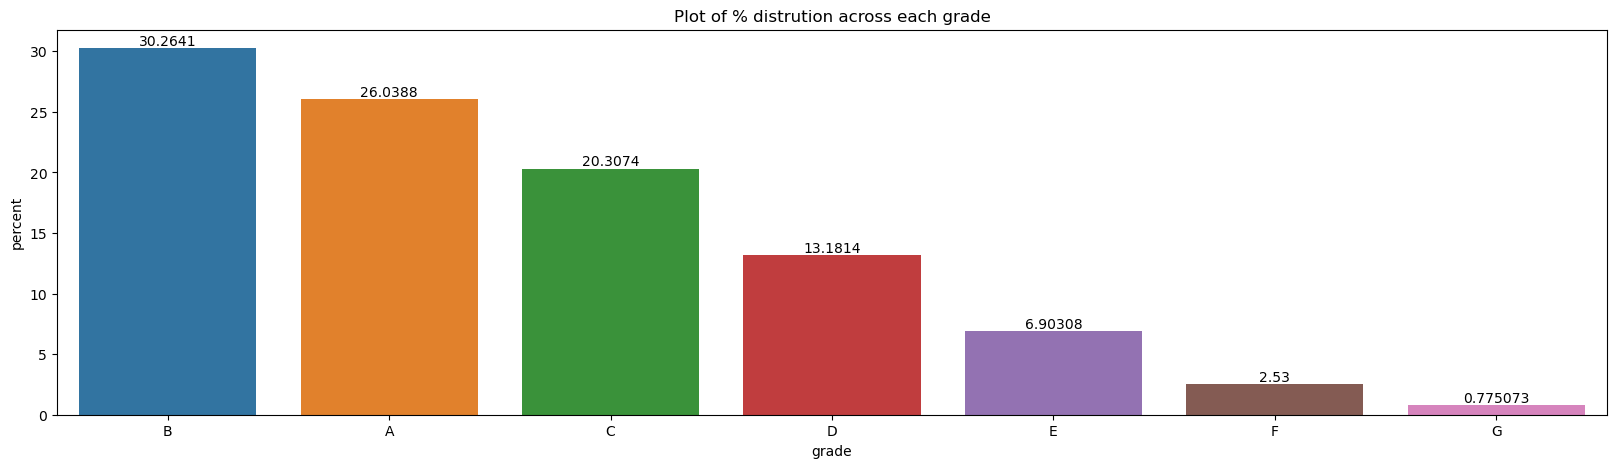

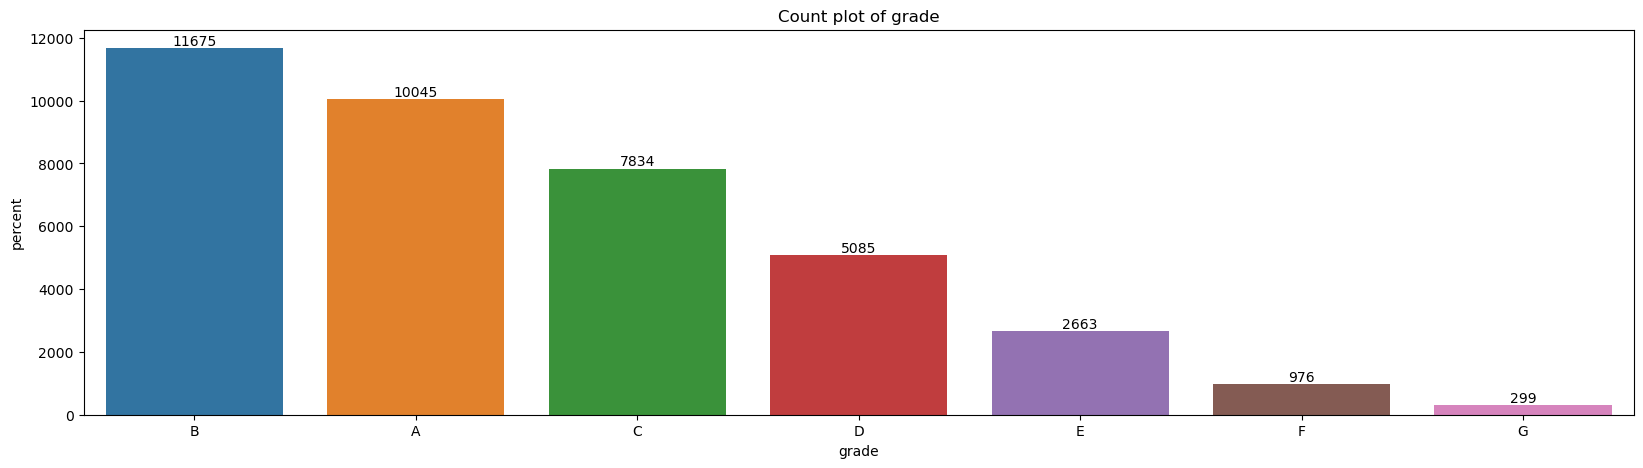

In [455]:
plotCatCountAndPercentageUnivaraite(loanData, "grade")

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


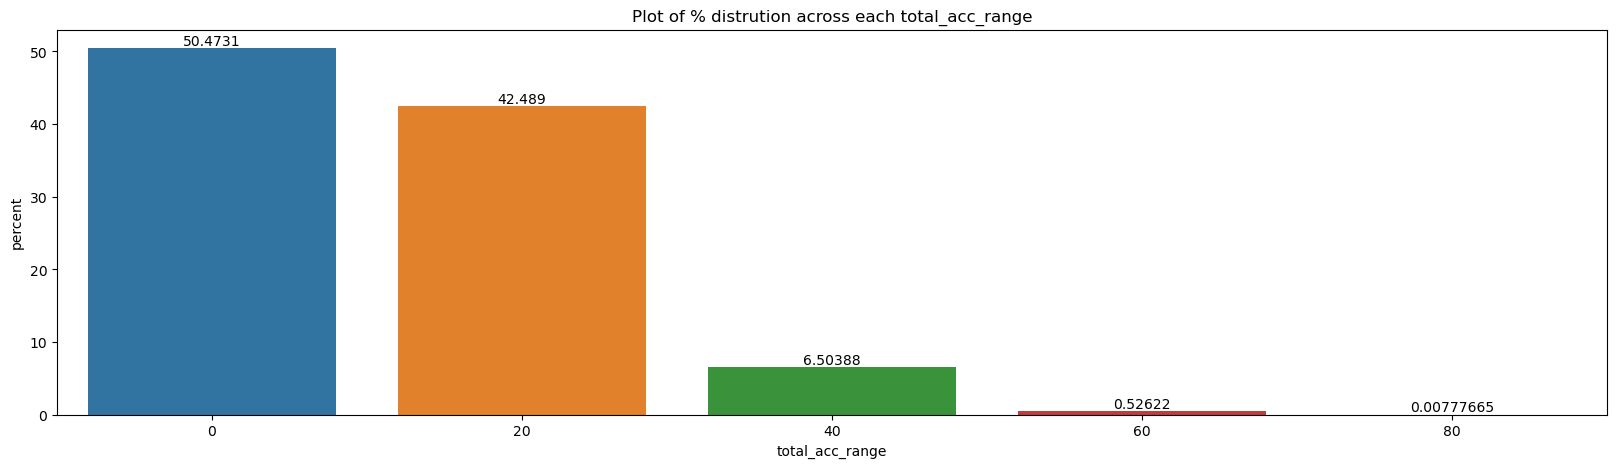

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


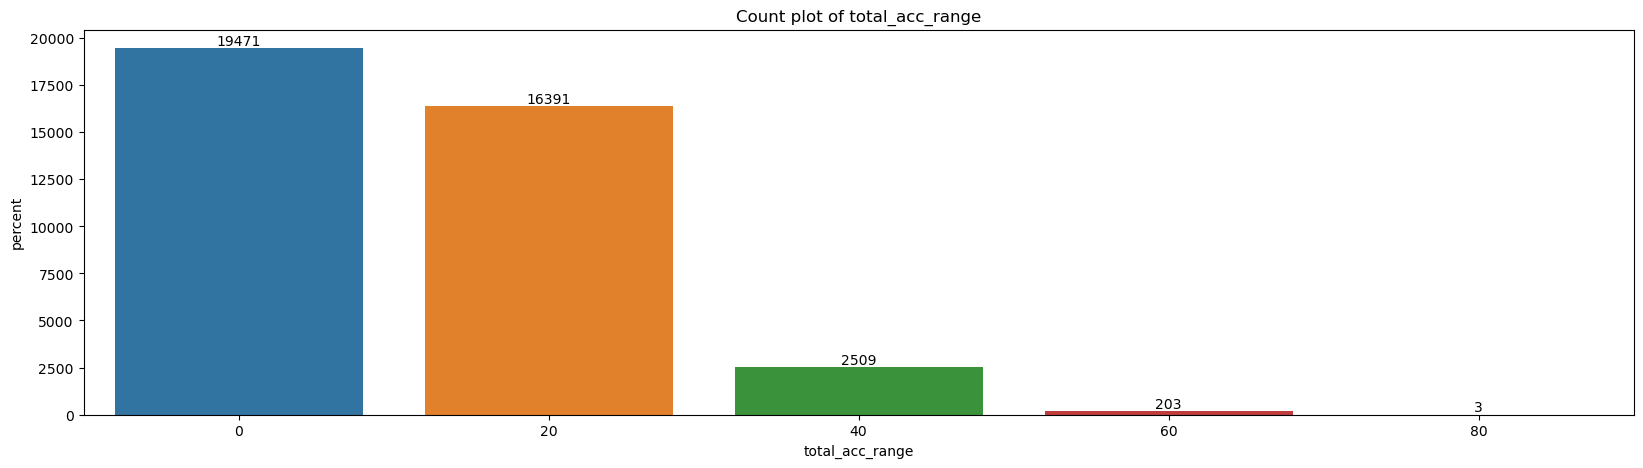

In [456]:
plotCatCountAndPercentageUnivaraite(loanData, "total_acc_range")


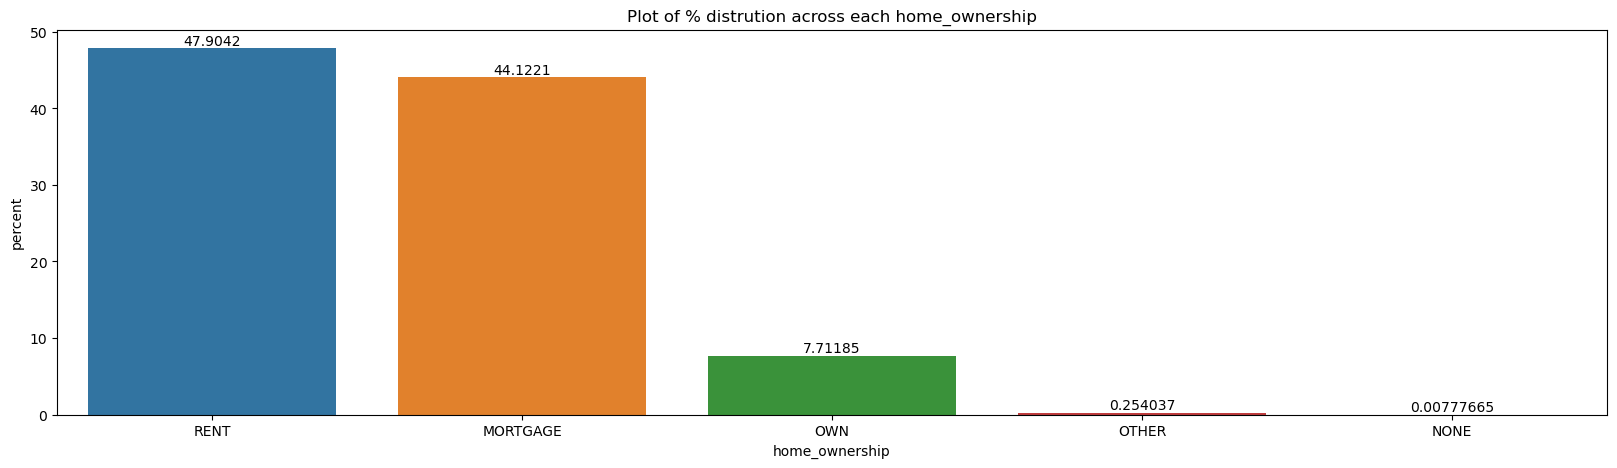

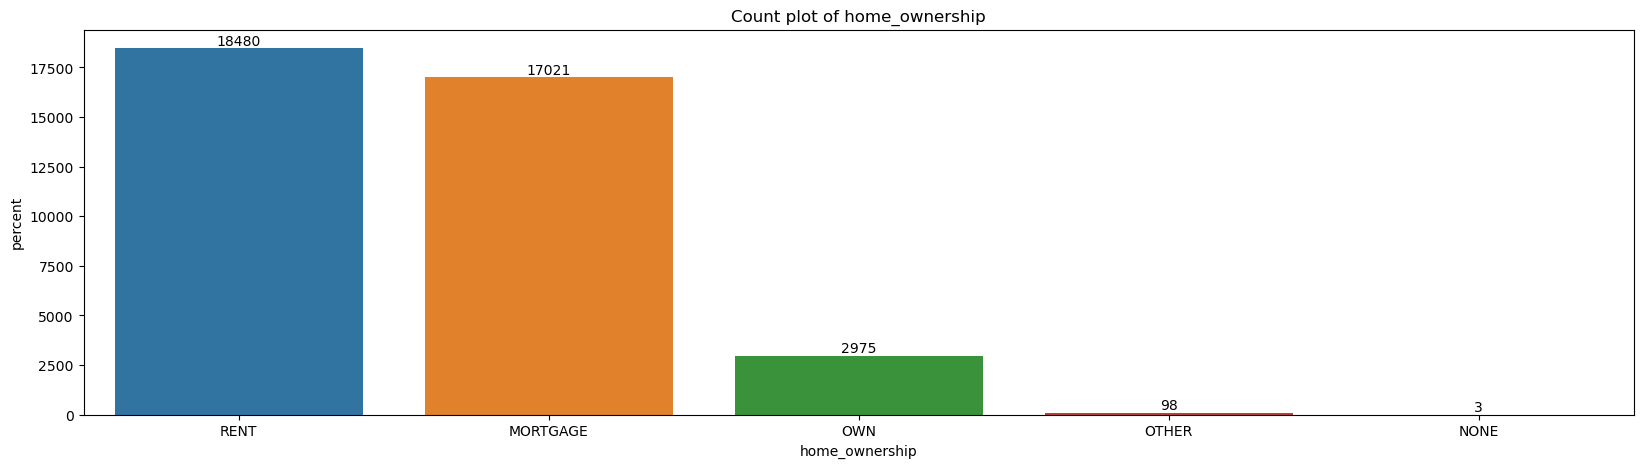

In [457]:
plotCatCountAndPercentageUnivaraite(loanData, "home_ownership")

Due to low samples in this category the count of other is very low and it peaks for Defaulters which could be due to low SNR 

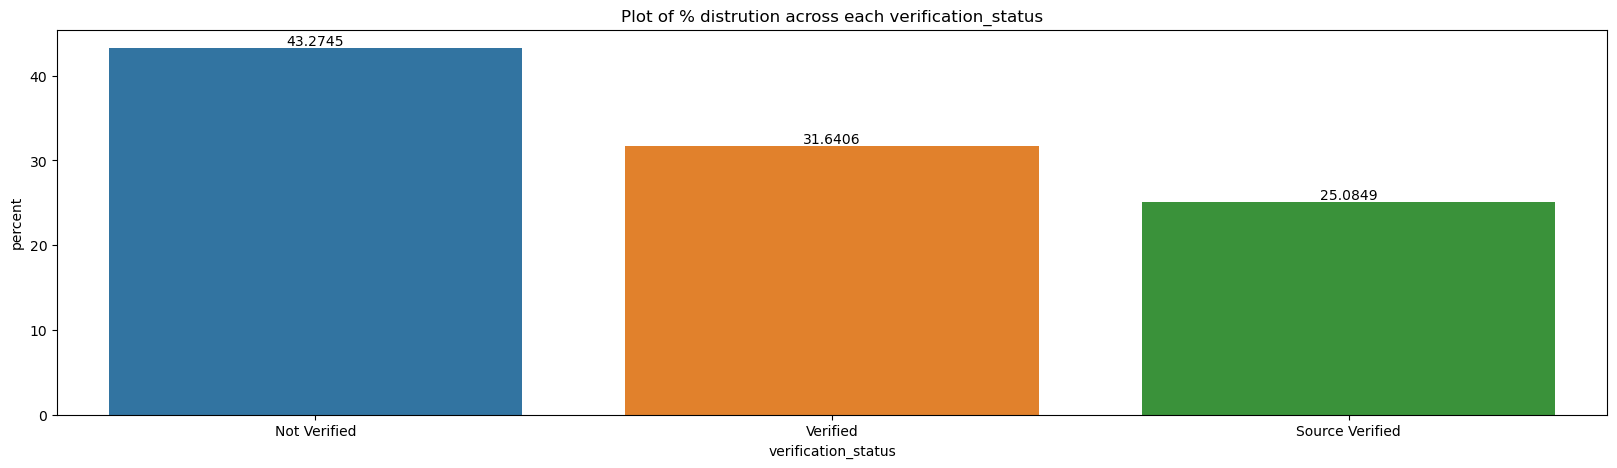

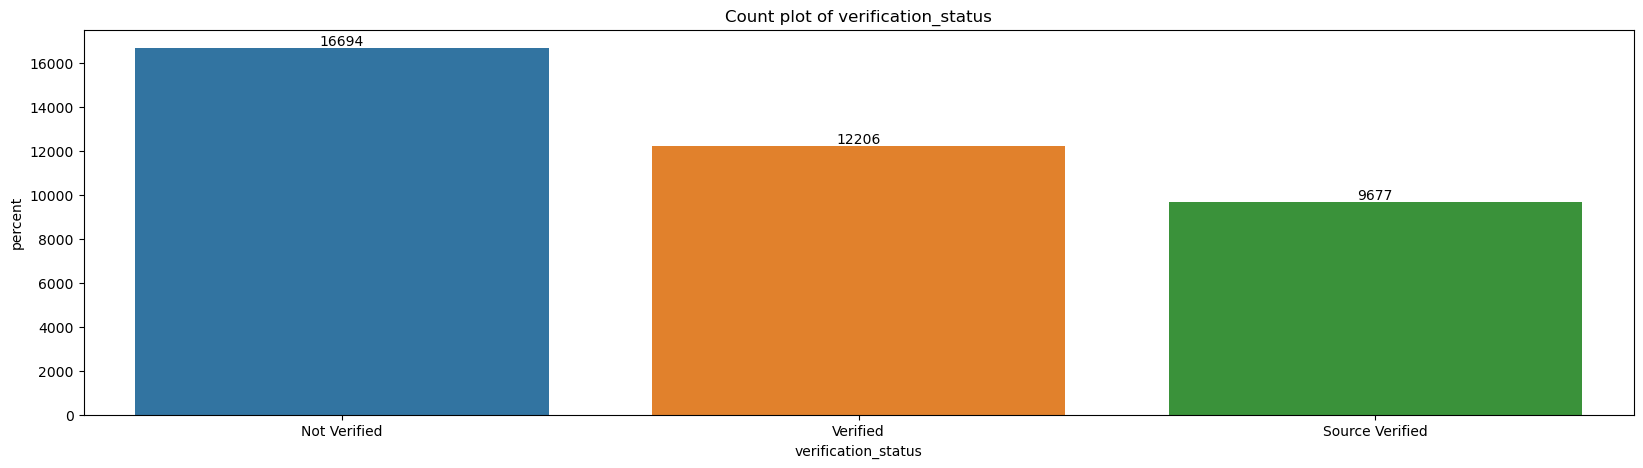

In [458]:
plotCatCountAndPercentageUnivaraite(loanData, "verification_status")

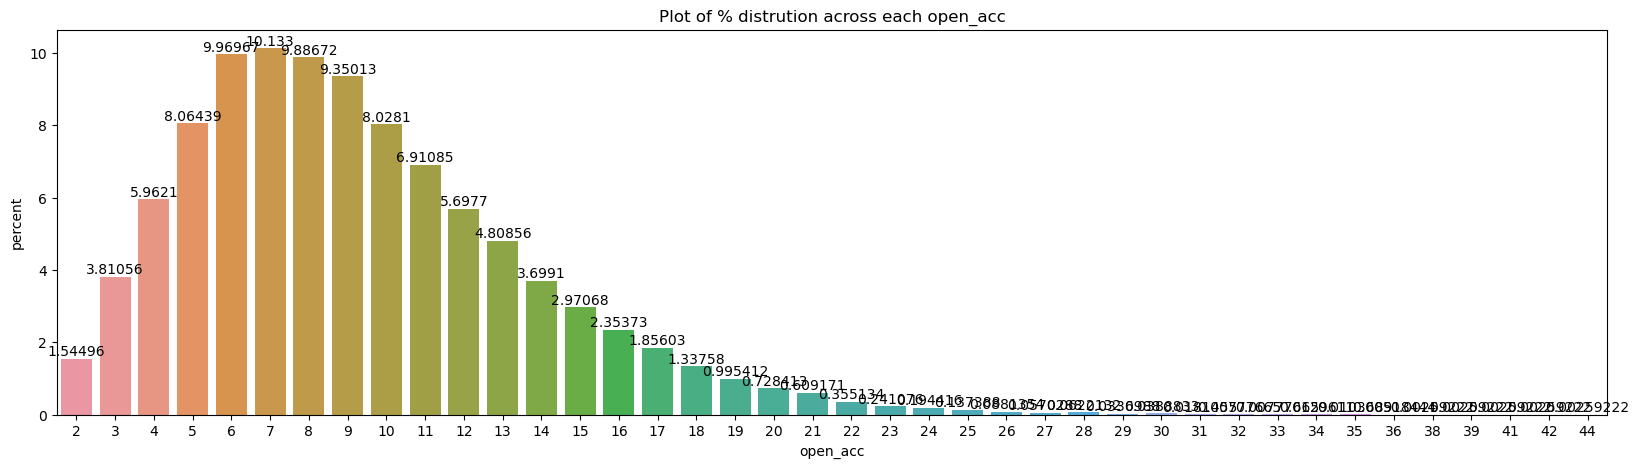

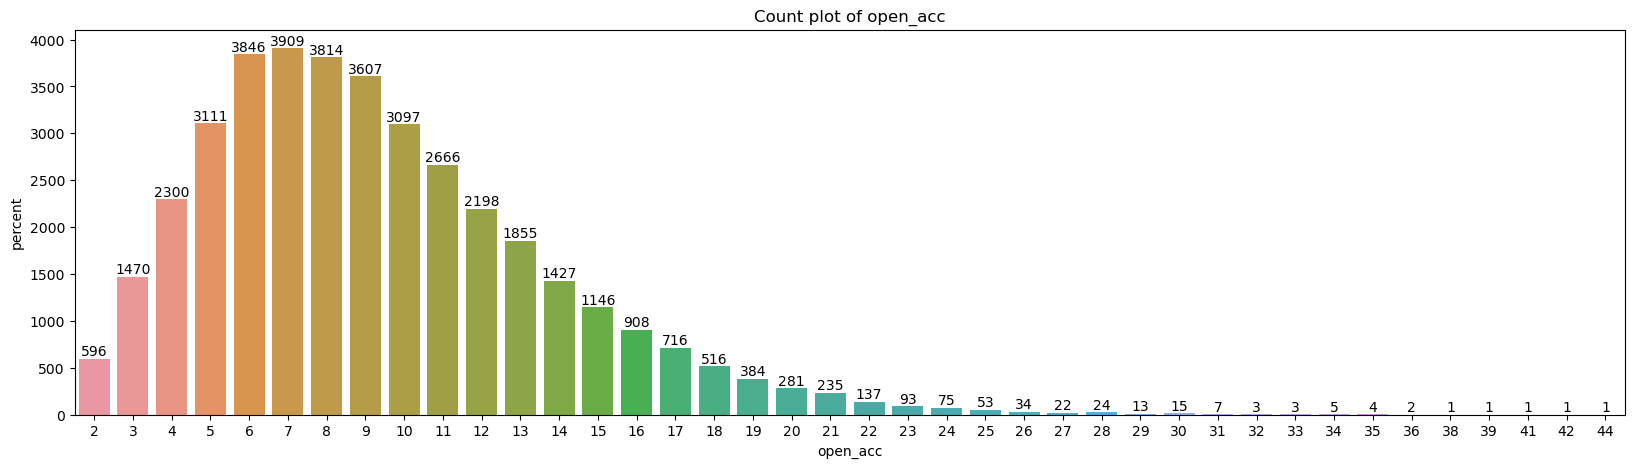

In [459]:
plotCatCountAndPercentageUnivaraite(loanData, "open_acc")


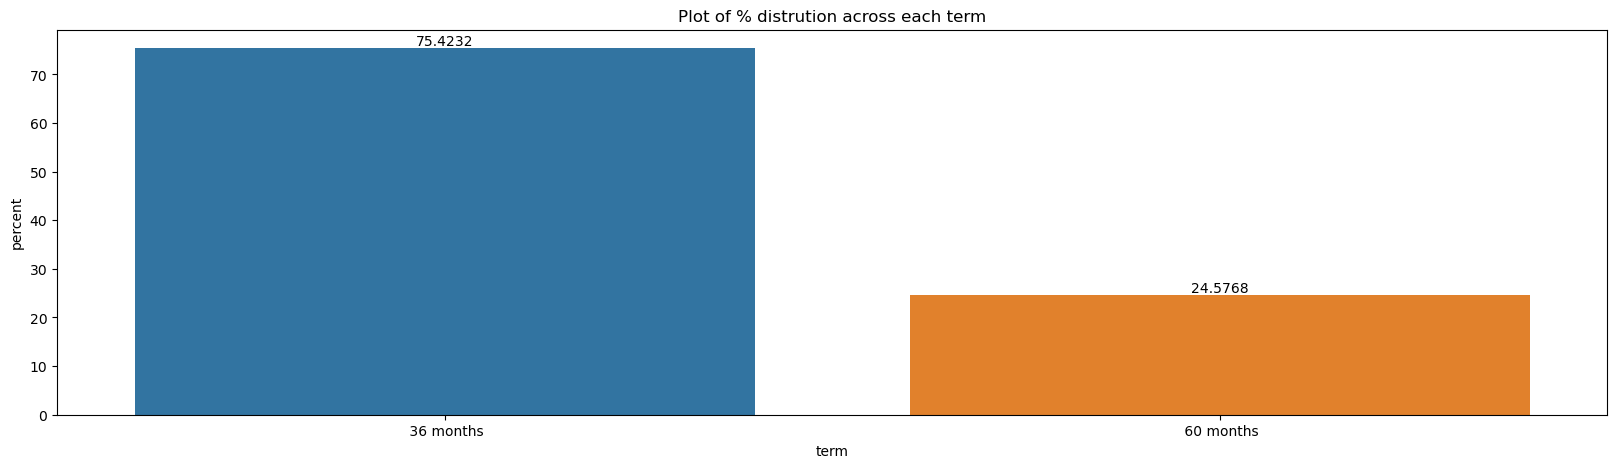

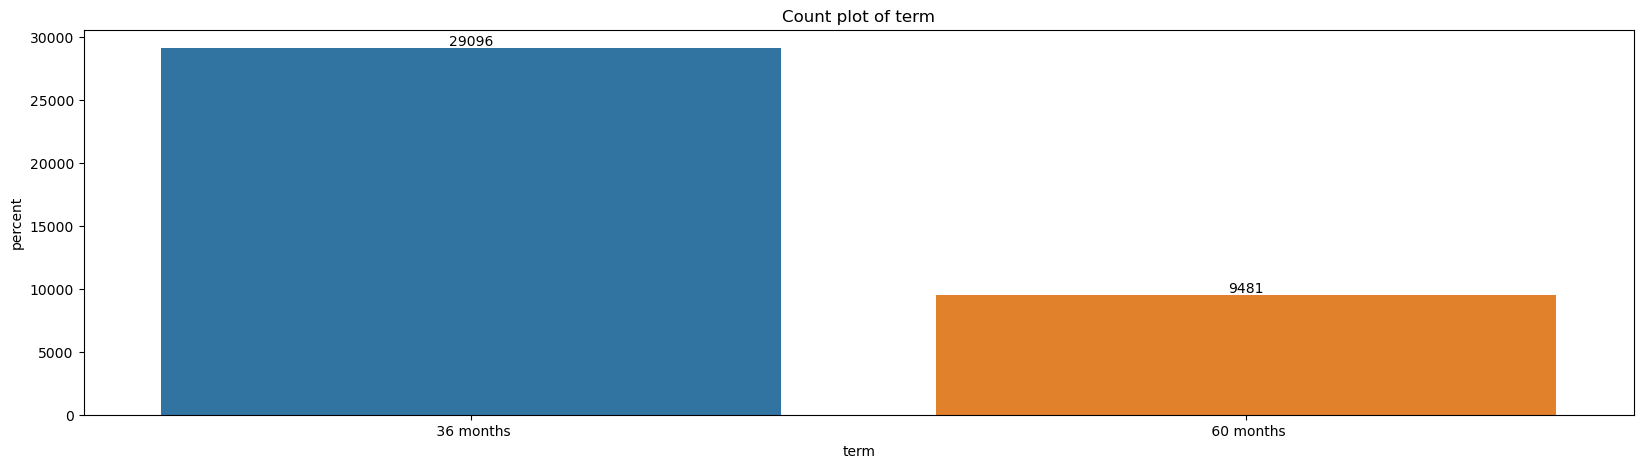

In [460]:
plotCatCountAndPercentageUnivaraite(loanData, "term")

75% of time is 36 months term 

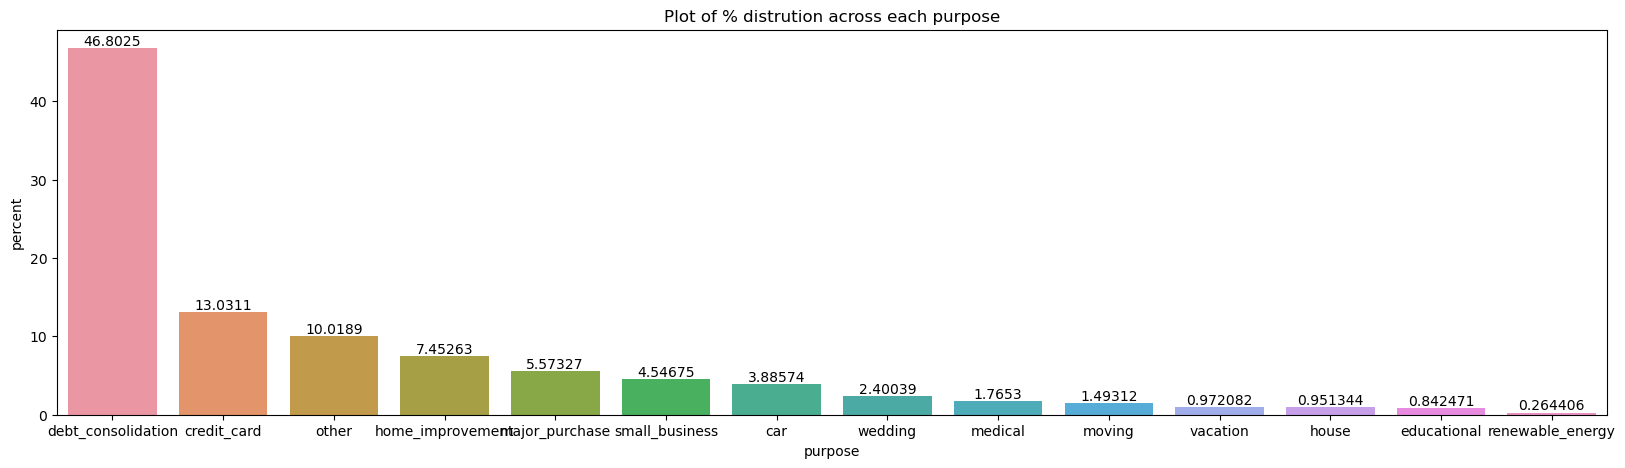

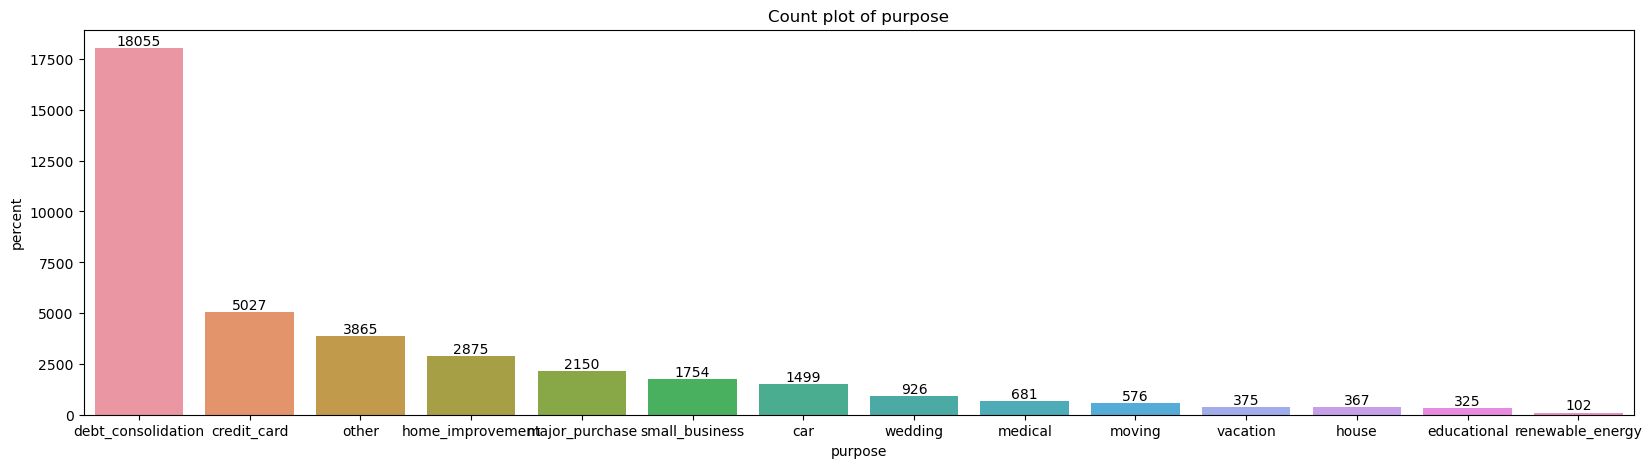

In [461]:
plotCatCountAndPercentageUnivaraite(loanData, "purpose")


# Bivariate Analysis

In [462]:
# To plot scatter plot for two features creating function
def plotScatter(x, y):
    plt.figure(figsize=(20,5))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loanData)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue):
    plt.figure(figsize=(20,5))
    ax = sns.barplot(x=x, y='is_defaulter', hue=hue, data=loanData)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title("Loan Default ratio wrt "+x+" for "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Ratio of Loan defauls", fontsize=16)
    plt.show()

Categorial Data

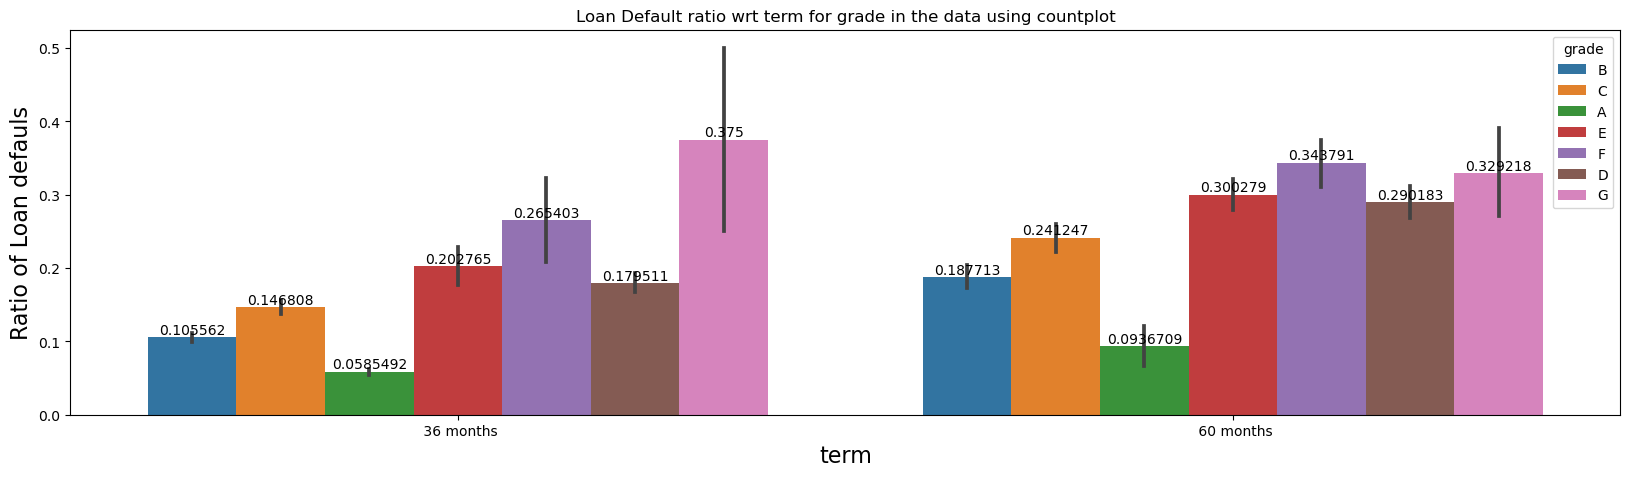

In [463]:
plotBivariateBar( "term", "grade")

~37.5% for G with 36 months

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


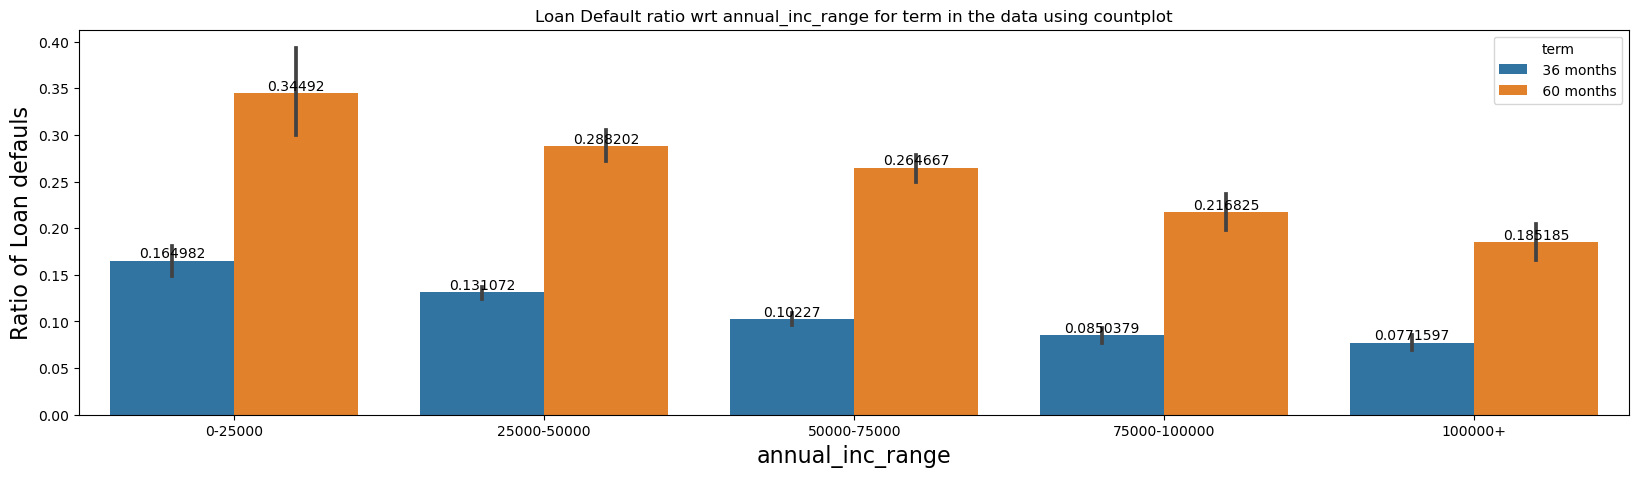

In [464]:
# using countplot needs to check for defaulters wrt annual_inc and purpose in the data 
plotBivariateBar("annual_inc_range", "term")

34% for low income range and 60 ternure

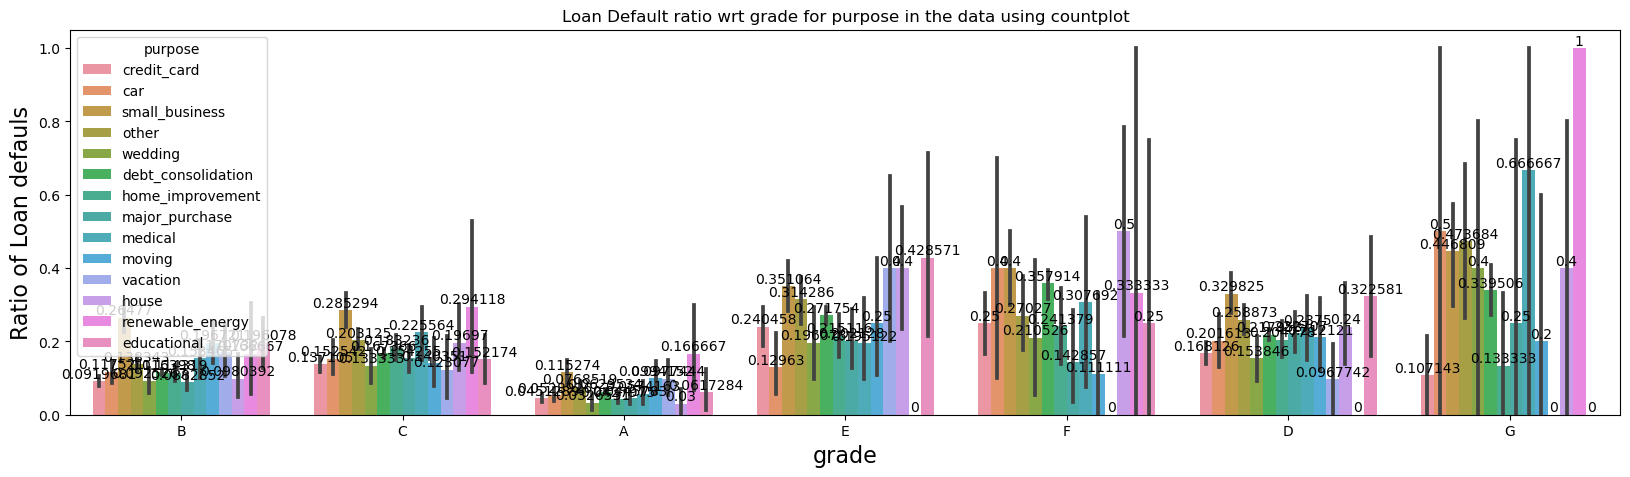

In [465]:
#With respect to grade and purpose in the data check defaulters 
plotBivariateBar("grade", "purpose")

Small bus in E, F an G above 40% (50 with F)

Renewable energy and medical is 100% and 66% in defaulter chances where renewable seem to be outlier due to low sample count in this category


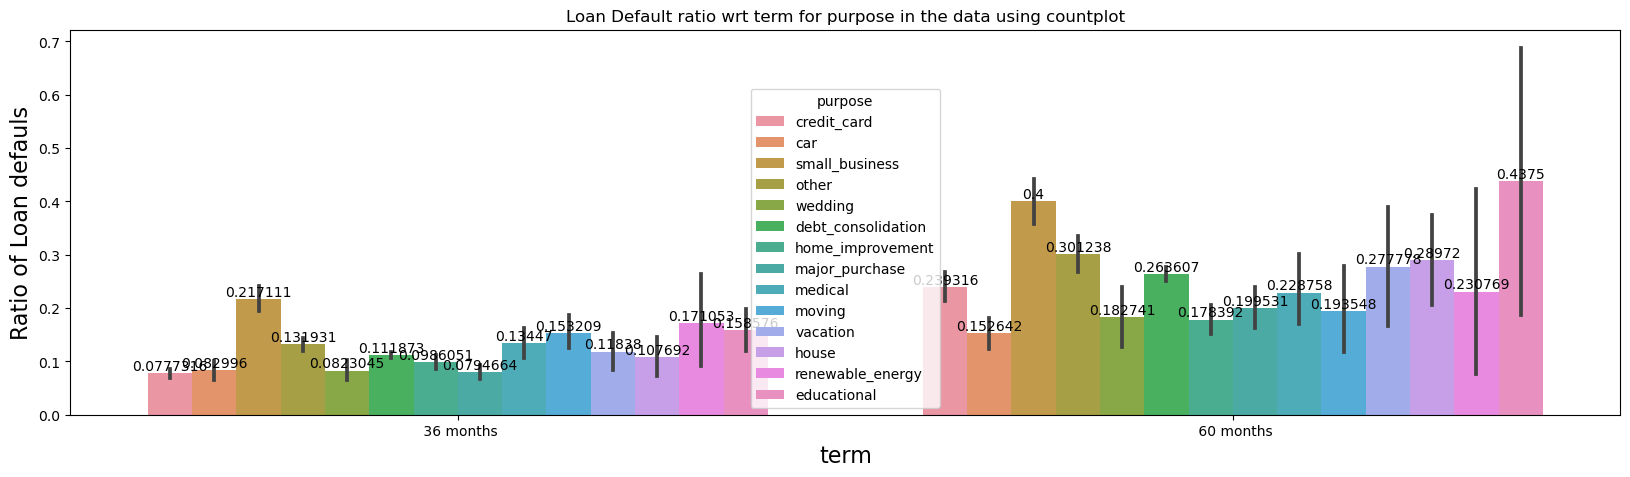

In [466]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

Educational in 60 month tenure has 40% defaulter chances

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


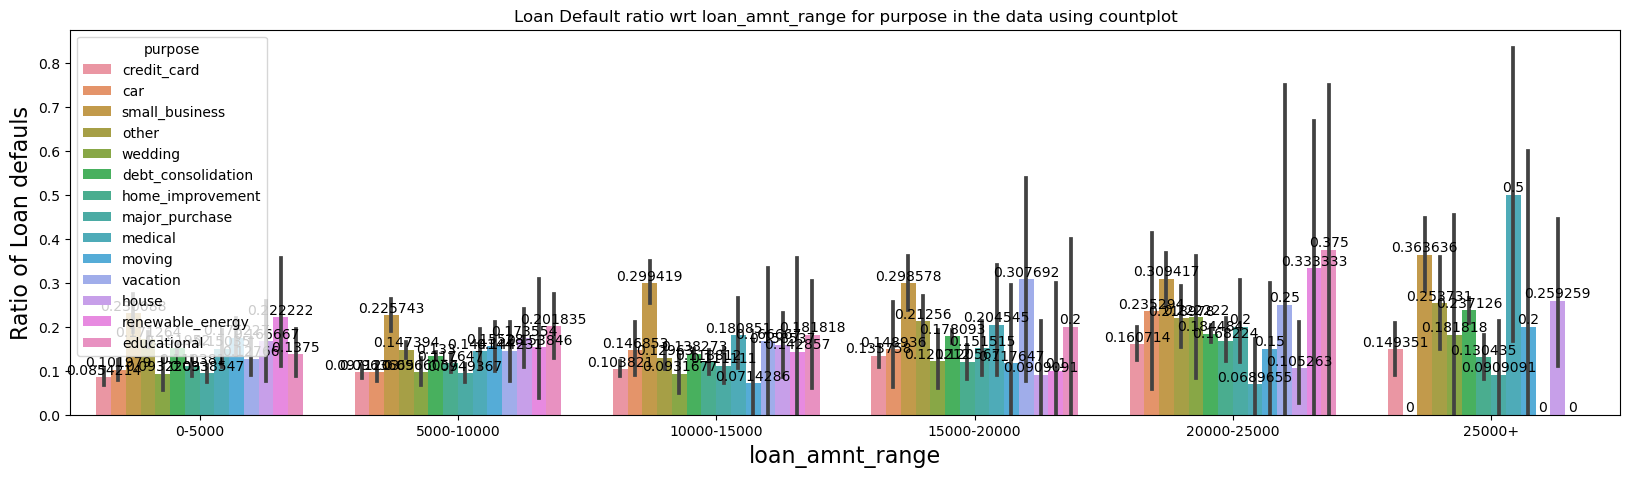

In [467]:
# checking defaulters with respect to loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

50% chaces in medical with 25K+ loan amount

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


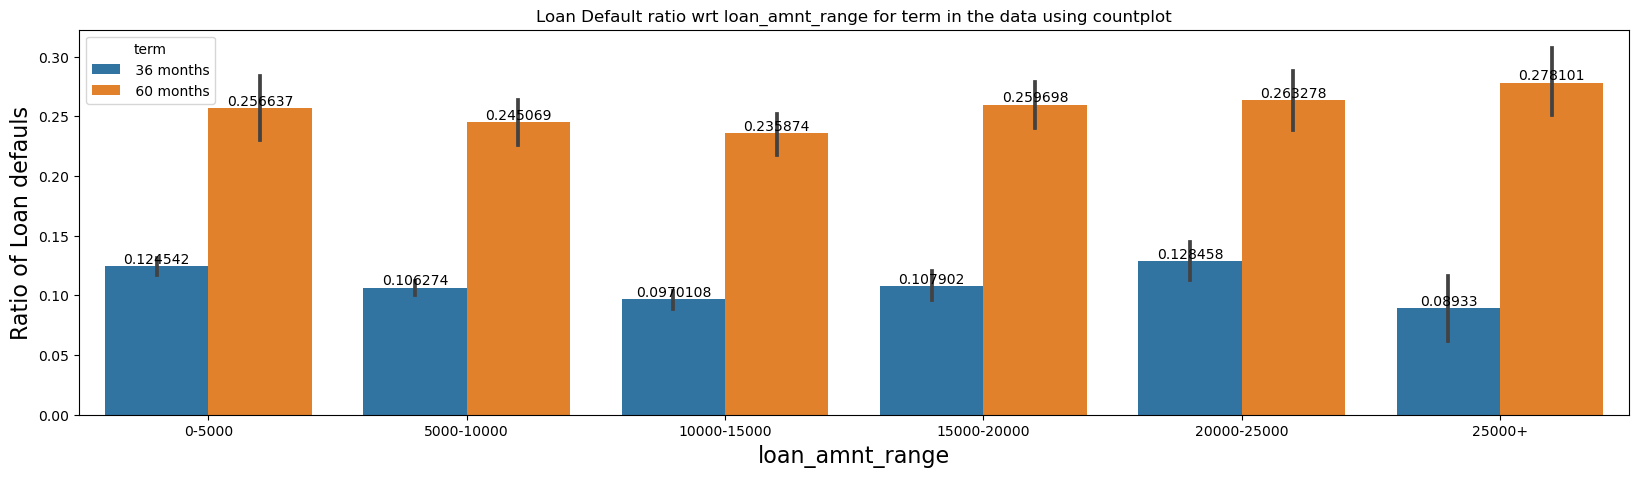

In [468]:
# With respect to loan_amnt_range and term in the data check for defaulters 
plotBivariateBar("loan_amnt_range", "term")

If Loan amount range increase then default ratio also increases for every term with respect to loan_amnt_range

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


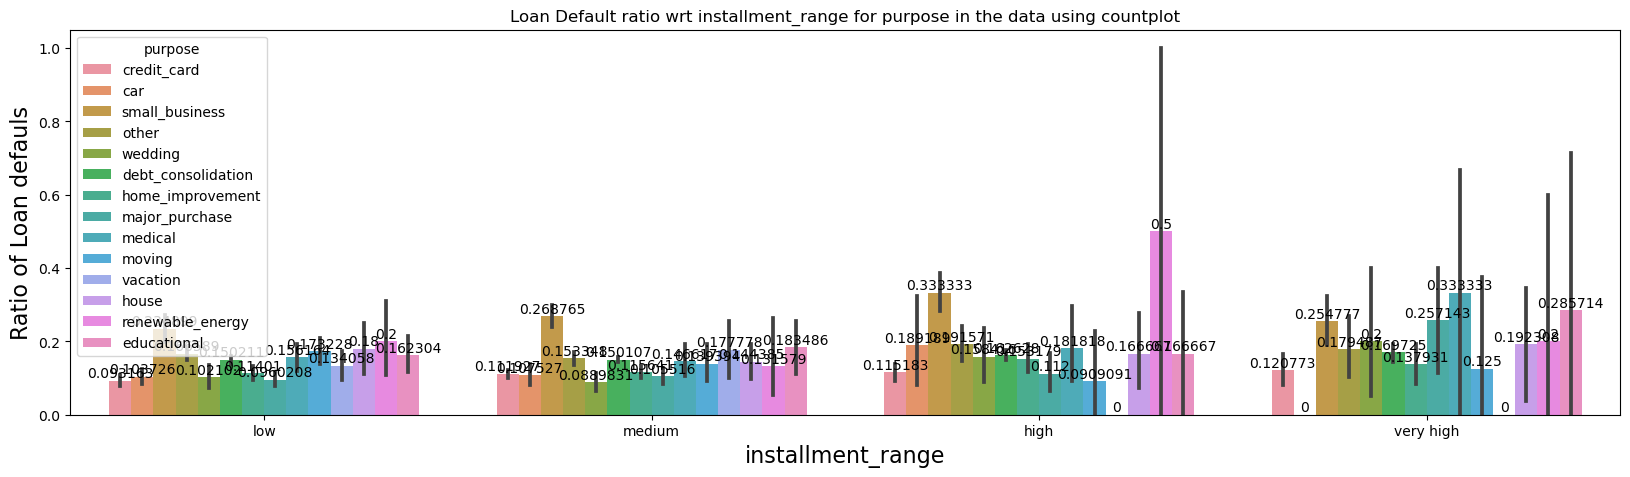

In [469]:
# With respect to installment and purpose in the data check for defaulters 
plotBivariateBar("installment_range", "purpose")

As we can see  default ratio increases for every purpose wrt installment except for small_business

c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\rajsv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


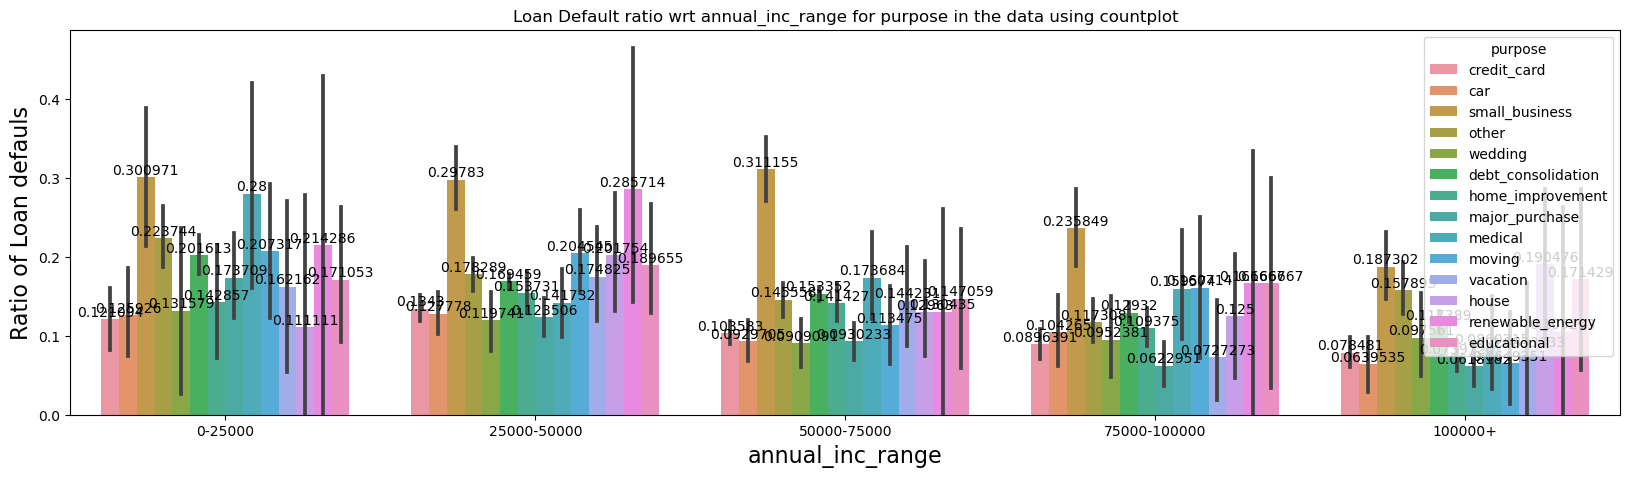

In [470]:
#  With respect to annual_inc_range and purpose in the data check for defaulters
plotBivariateBar("annual_inc_range", "purpose")

As we can see default ratio increases for every purpose wrt annual_inc_range

In [471]:
# Continuous Data

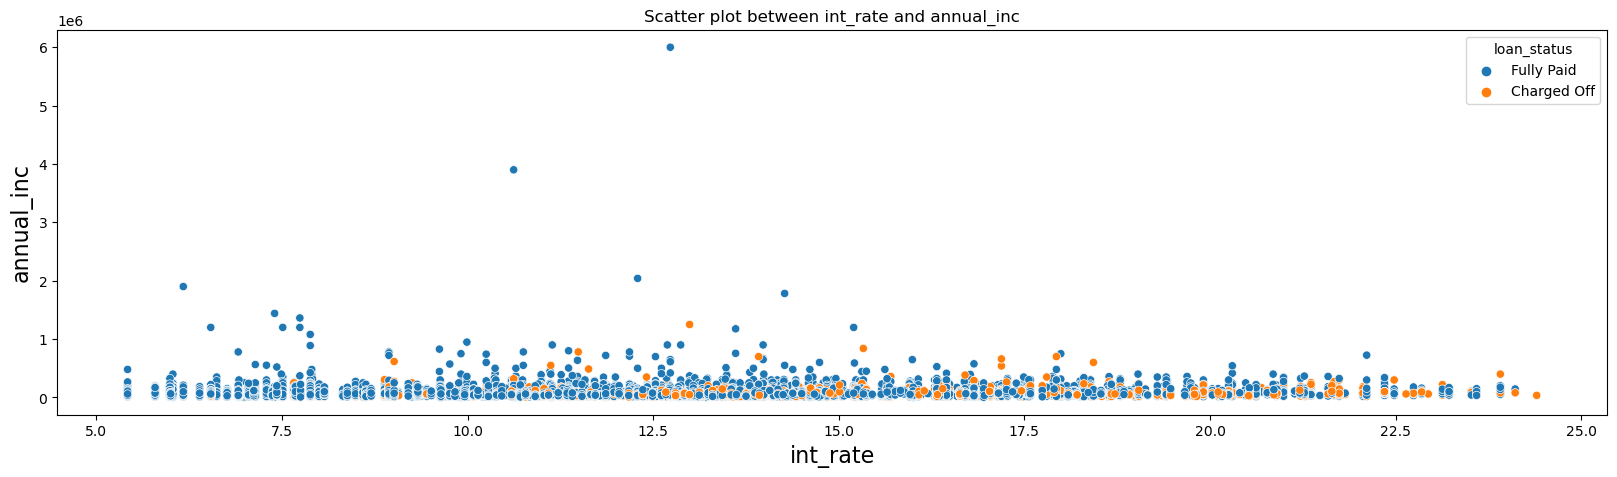

In [472]:
# check for defaulters wrt int_rate and annual_inc in the data
plotScatter("int_rate", "annual_inc")

No correlation found

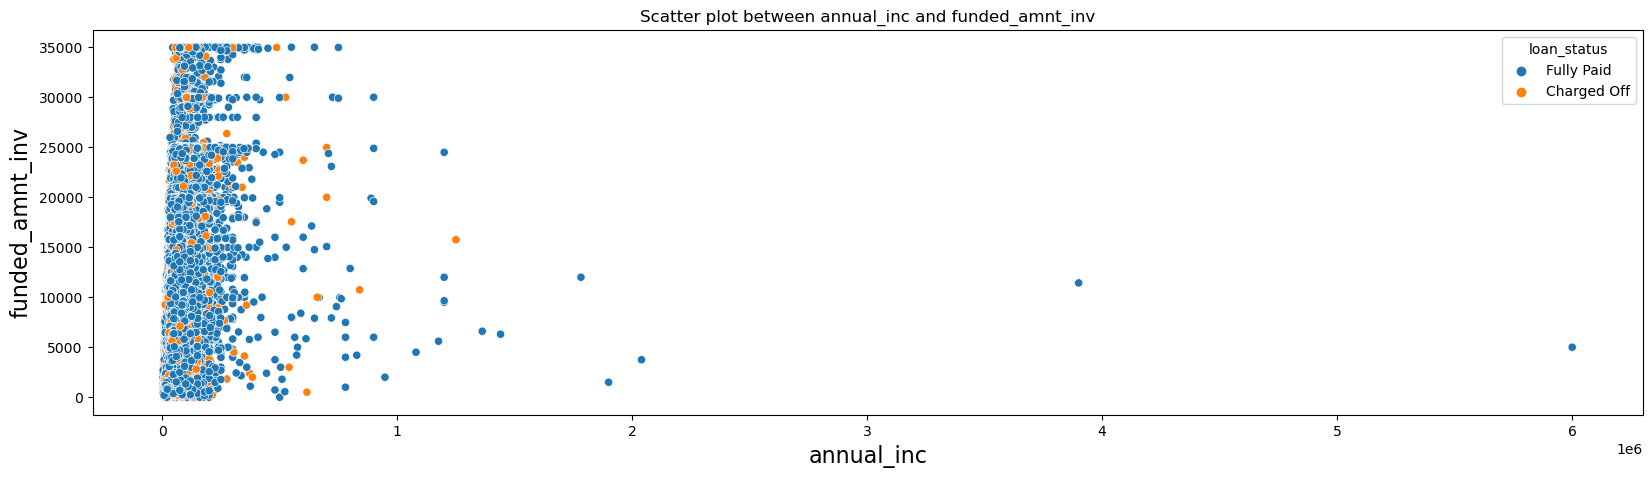

In [473]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")

No correlation found


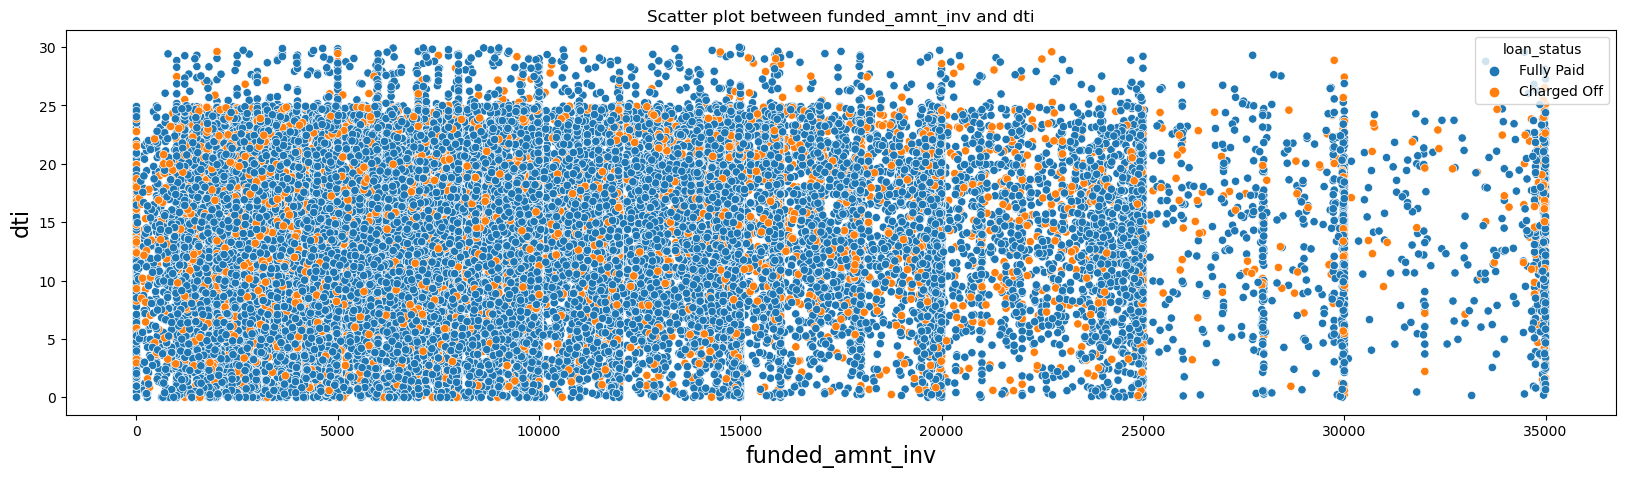

In [474]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")

No correlation found

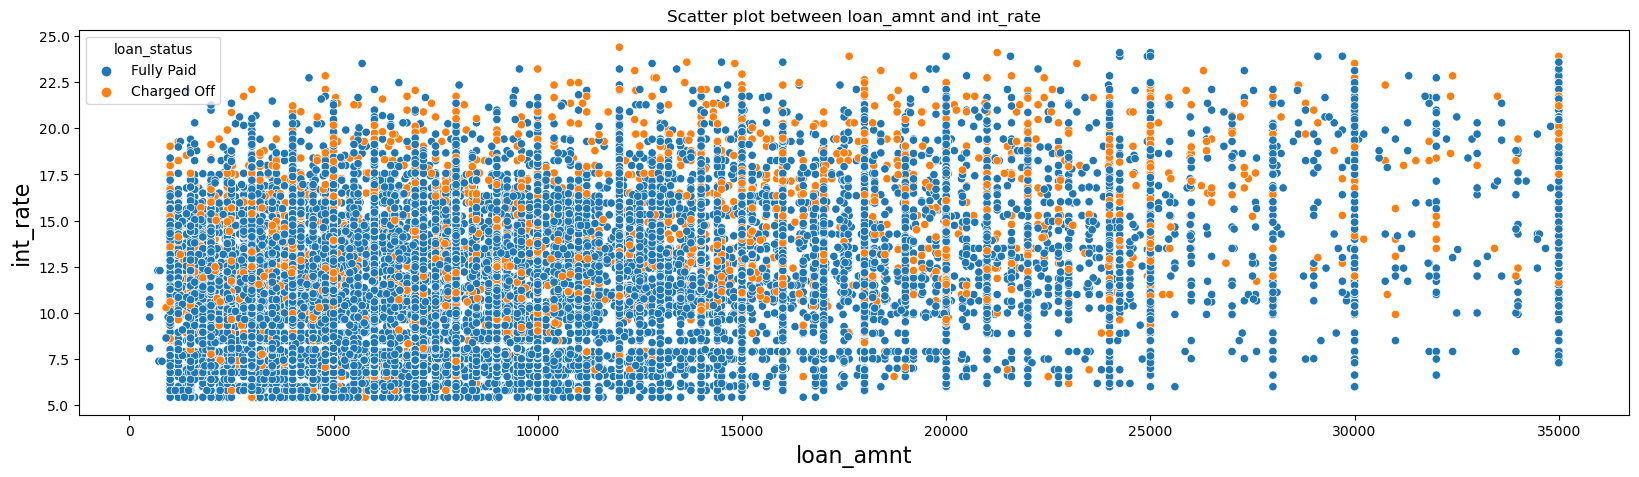

In [475]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

No correlation found

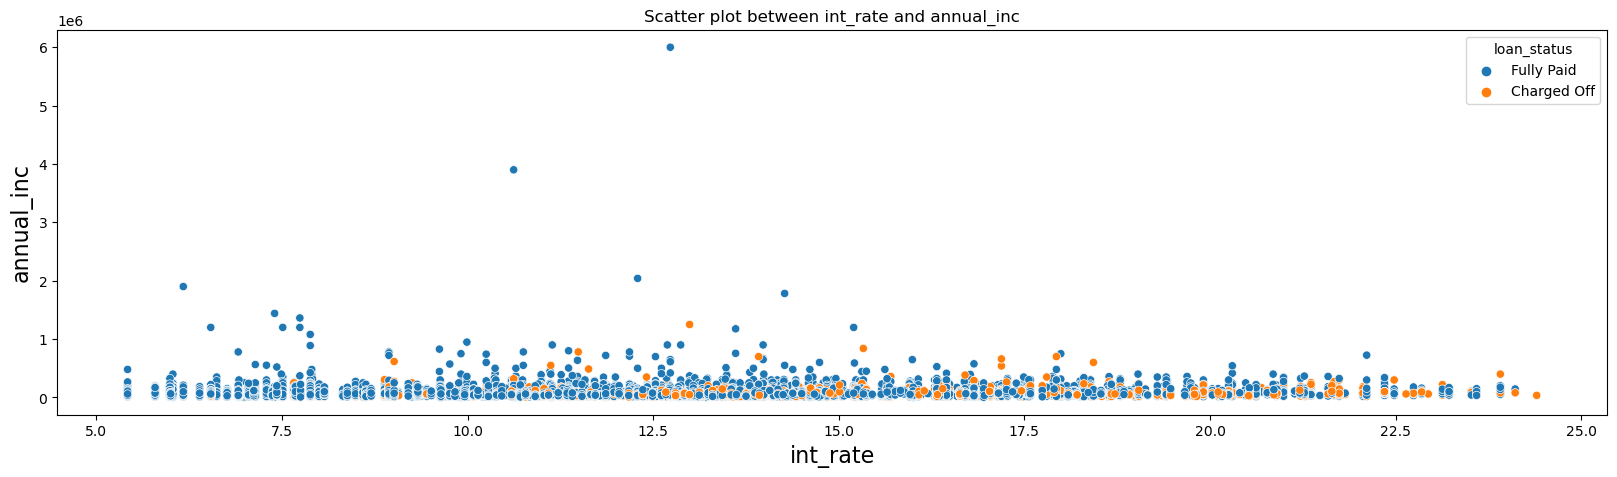

In [476]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

No correlation found

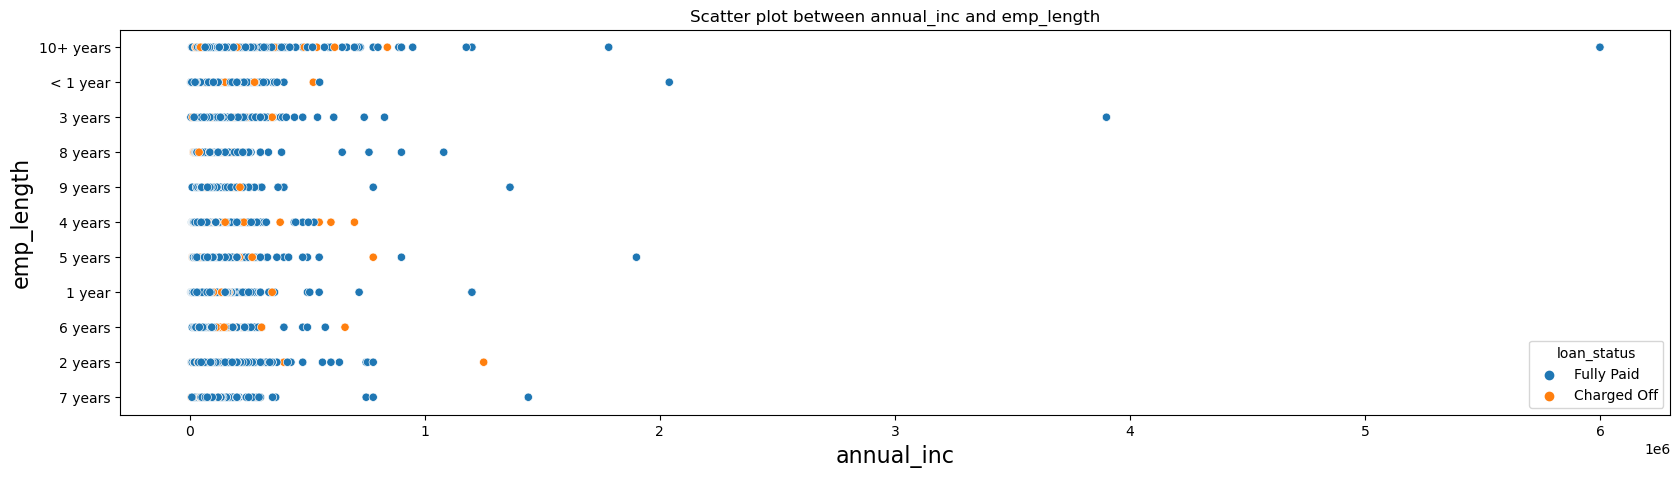

In [477]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

No correlation found


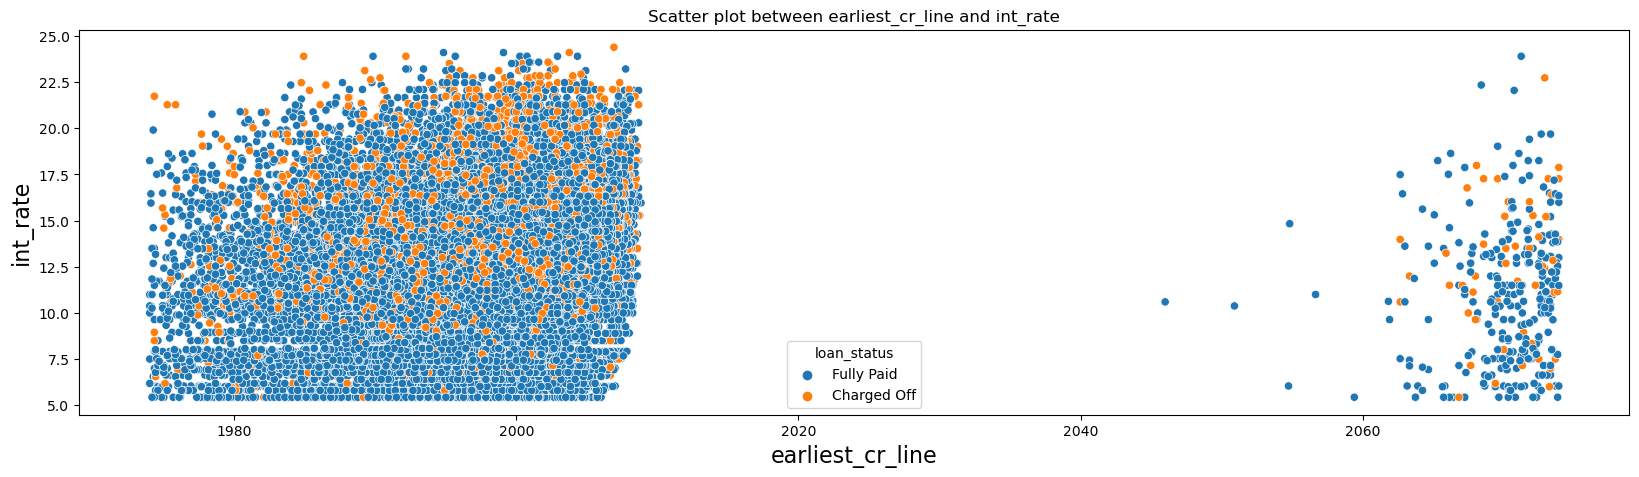

In [478]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")

No correlation found

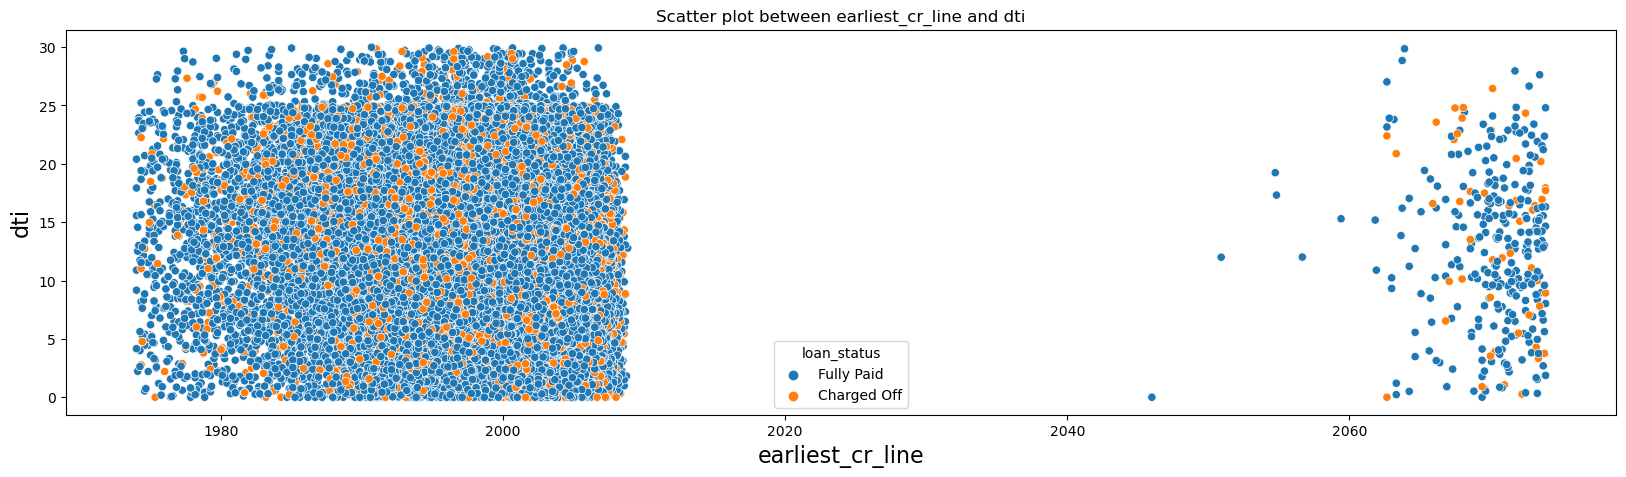

In [479]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")

No correlation found

# Categorial vs Continuous Data Types

In [480]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(20,5))
    sns.boxplot(x=x, y=y, data=loanData, hue=hue, order=sorted(loanData[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

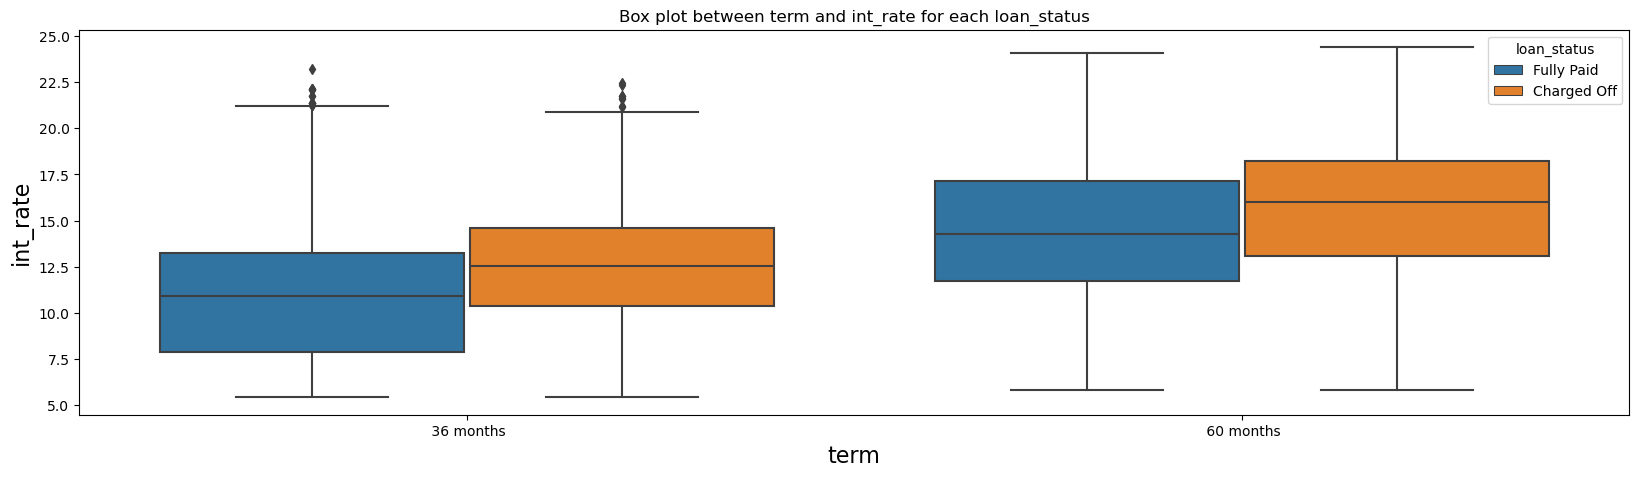

In [481]:
# For term vs int_rate for each loan_status
plotBox("term", "int_rate")

The chances of default also increases int_rate increases with term on loan 

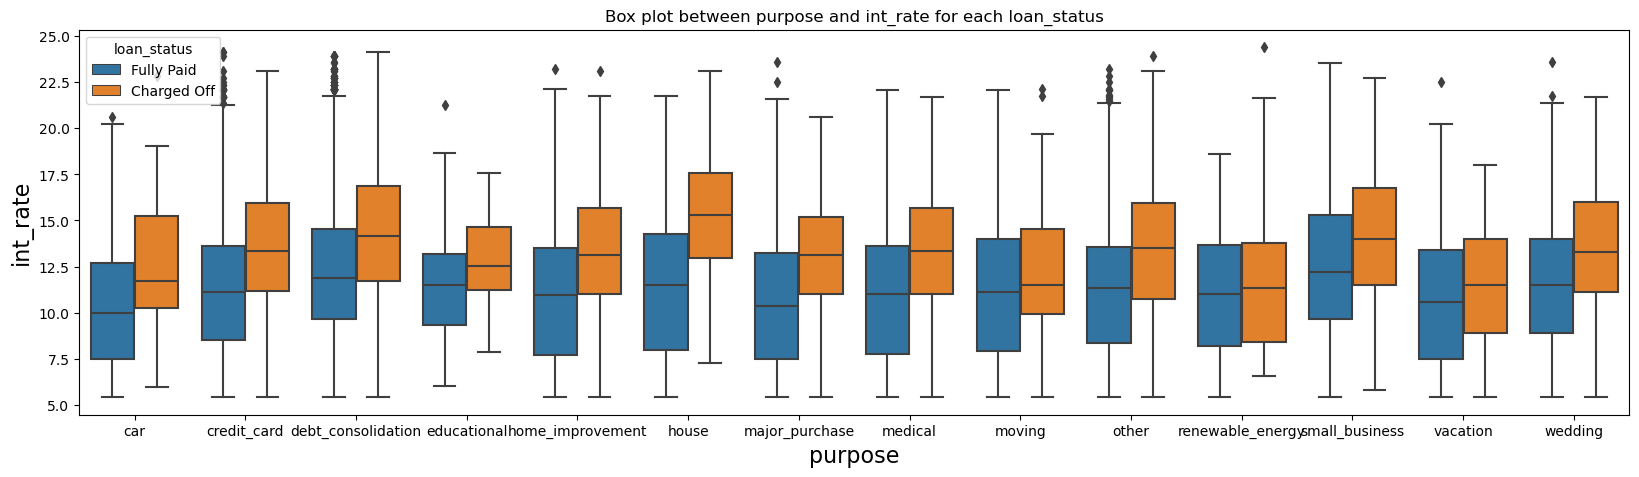

In [482]:
# plot box for loan_status vs int_rate for each purpose
plotBox("purpose", "int_rate")

Loan is defaulted for every purpose value and int_rate is quite high 

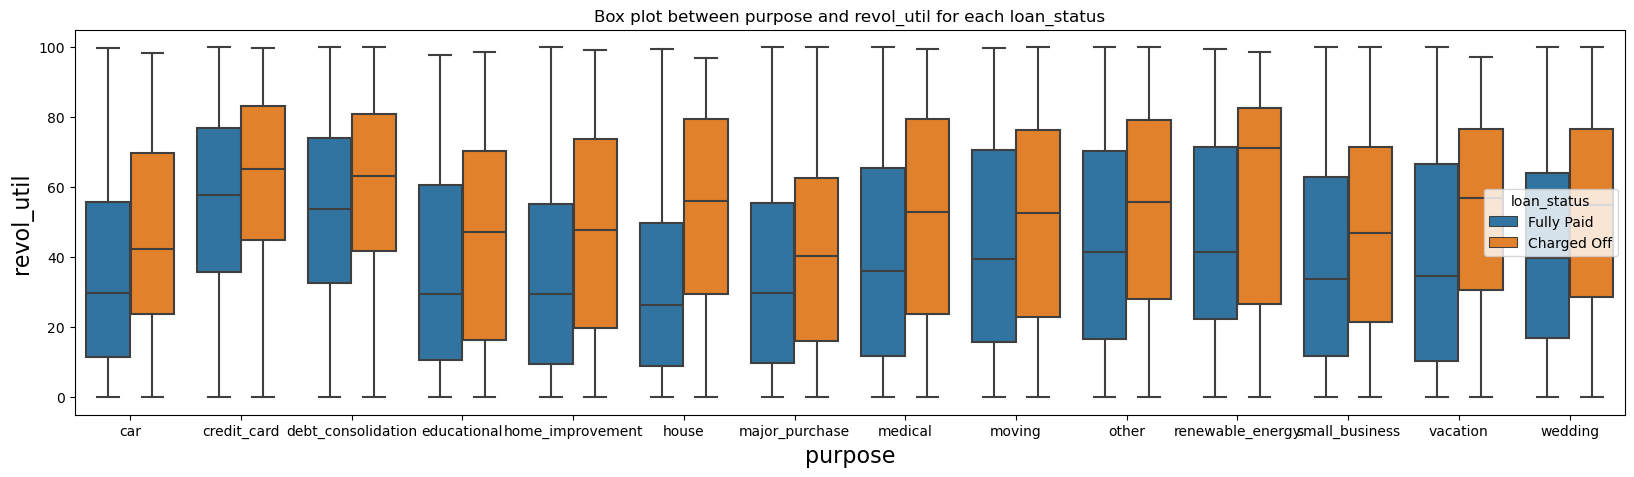

In [483]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")

revol_util is more for every purpose value where the loan is defaulted and quite high for credit_card

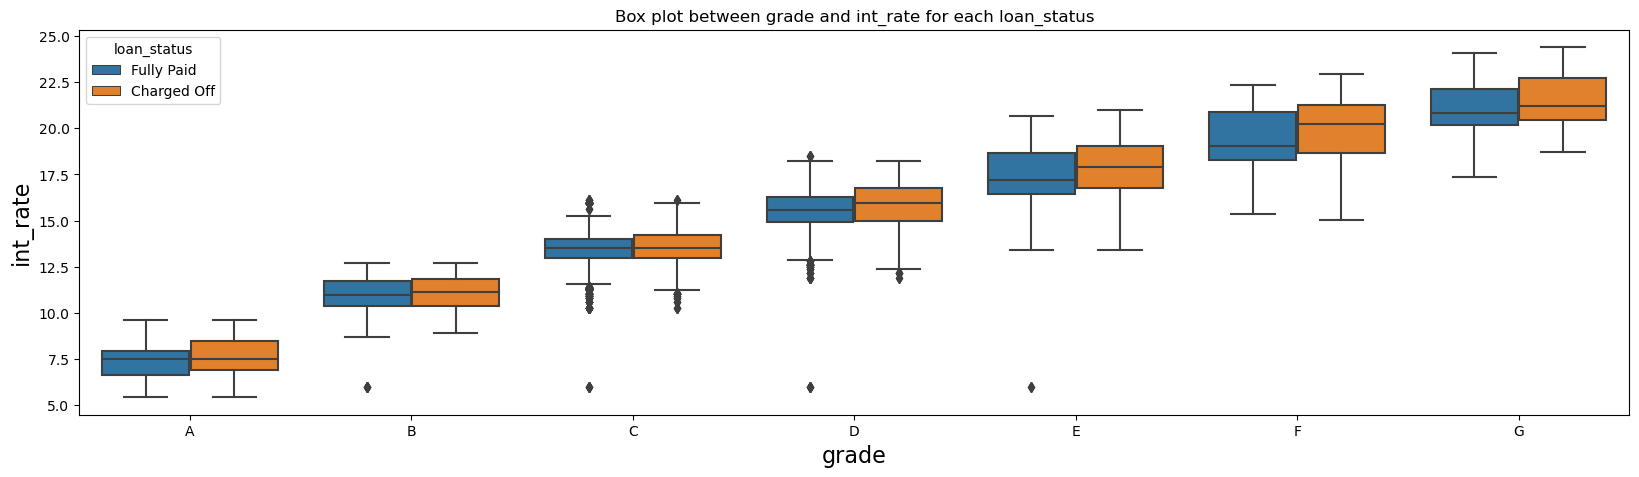

In [484]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

 Defaulters for every grade are having their median near the non-defaulter 75% quantile of int_rate also int_rate is increasing with every grade

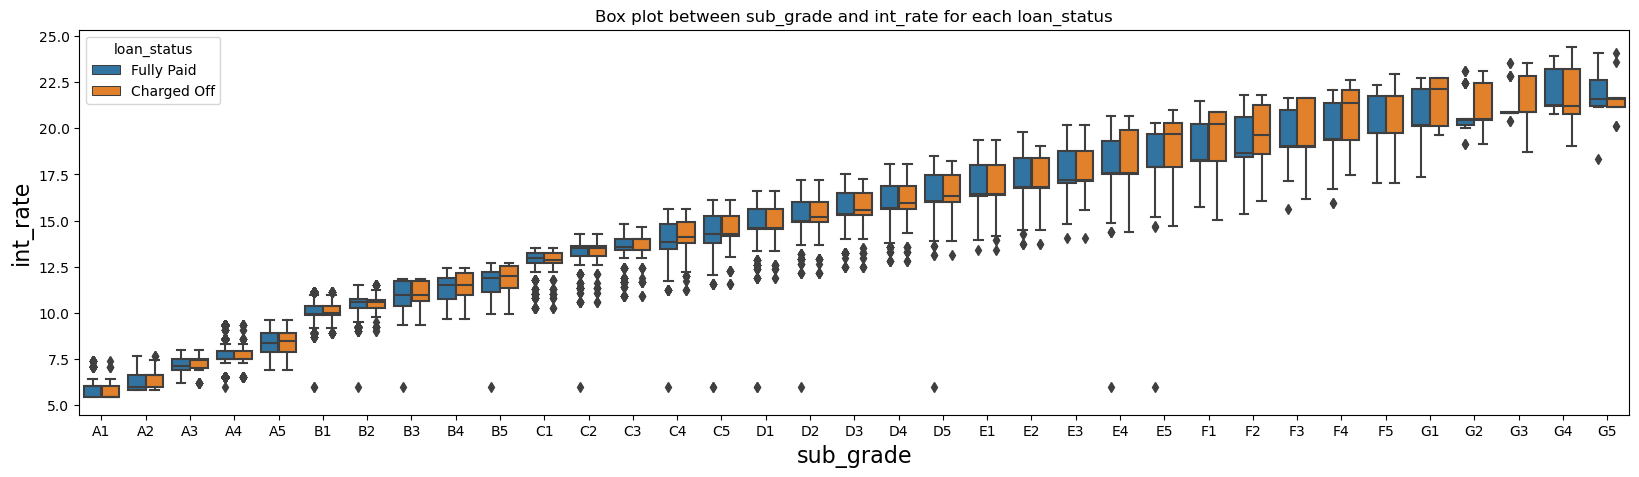

In [485]:
# plot box for sub_grade vs int_rate for each loan_status
plotBox("sub_grade", "int_rate", "loan_status")

This graph represents that int rate increase with sub grade.

We have observed following are the important feature we deduced from above Bivariate analysis:

- term
- int_rate
- purpose
- revol_util
- grade
- sub_grade
- annual_inc
- funded_amnt_inv


# Multivariate Analysis

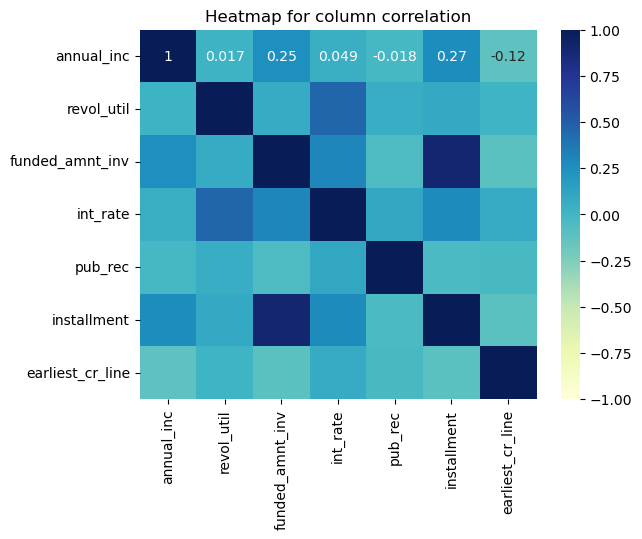

In [486]:
# plot heat map to see correlation between features
continuous_f = ["annual_inc", "revol_util", "funded_amnt_inv", "int_rate", "pub_rec", "installment", "earliest_cr_line"]
loan_corr = loanData[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Heatmap for column correlation")
plt.show()

Except installment and funded_amnt_inv there is not other singificant correlation between any of these variables.


### Analysis

After analysis we have observed that best driving factors for the Loan default analysis are: 

- Term
- Purpose
- Public Record for bankruptcies
- Annual income
- Interest rate
- Grade
- Sub Grade
